# HR-Employee-Attrition

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

## 1.- LOAD LIBRARIES AND THE DATASET
## 2.- EXPLORATORY DATA ANALYSIS (EDA)
#### Quick descriptive analysis
#### Pearson´s correlations
#### Visualizations of features
#### Distribution for y its relations as hue with x´s 
#### Exploring interactions between two variables
## 3.-  PRINCIPAL COMPONENT ANALYSIS (PCA) & T-DISTRIBUTED STOCHASTIC NEIGHBOURING ENTITIES (T-SNE)
##  4.- DATA PREPARATION
#### Removal of not useful features
#### Label encoding for categorical variables
####  Standarization of data
####  Train Test split
#### SMOTE
## 5.- PIPELINES OF ALGOS (First approach)
## 6.- FEATURE IMPORTANCE IN RANDOM FOREST
## 7.- XGBOOST and FEATURE IMPORTANCE
## 8.- PERMUTATION IMPORTANCE
## 9.- PARTIAL DEPENDENCE PLOTS & SHAP VALUES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import regularizers
from pdpbox import pdp, info_plots 
from sklearn.model_selection import StratifiedKFold
from numpy import where
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical
from sklearn.linear_model import LogisticRegression
import collections
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import eli5
from eli5.sklearn import PermutationImportance
import shap 
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from textblob import TextBlob
from sklearn.decomposition import PCA
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
sns.set(style="darkgrid")
%matplotlib inline
plt.style.use('seaborn-talk')

Using TensorFlow backend.


In [2]:
mainpath = r"C:\Users\dataset"
filename = "HR-Employee-Attrition.csv"

data = pd.read_csv(mainpath+"/"+filename)

## 2.- EXPLORATORY DATA ANALYSIS (EDA)

#### Quick descriptive analysis

In [3]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
print(f"Number of rows: {data.shape[0]} and number of features: {data.shape[1]}")

Number of rows: 1470 and number of features: 35


In [7]:
display(f"Number of nan values: {pd.isnull(data).values.sum()}")
display(f"Any null value in dataset?: {pd.isnull(data).any().any()}")

'Number of nan values: 0'

'Any null value in dataset?: False'

In [8]:
cols = data.columns.values

num_f = []
obj_f  = []

for i in cols:
    if data[i].dtype=="int64":
        num_f.append(i)
    else:
        obj_f.append(i)

print(f"List of int64 features: {num_f} with length: {len(num_f)}")

print(f"List of object features: {obj_f} with length:  {len(obj_f)}")

List of int64 features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] with length: 26
List of object features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'] with length:  9


#### Pearson´s correlations

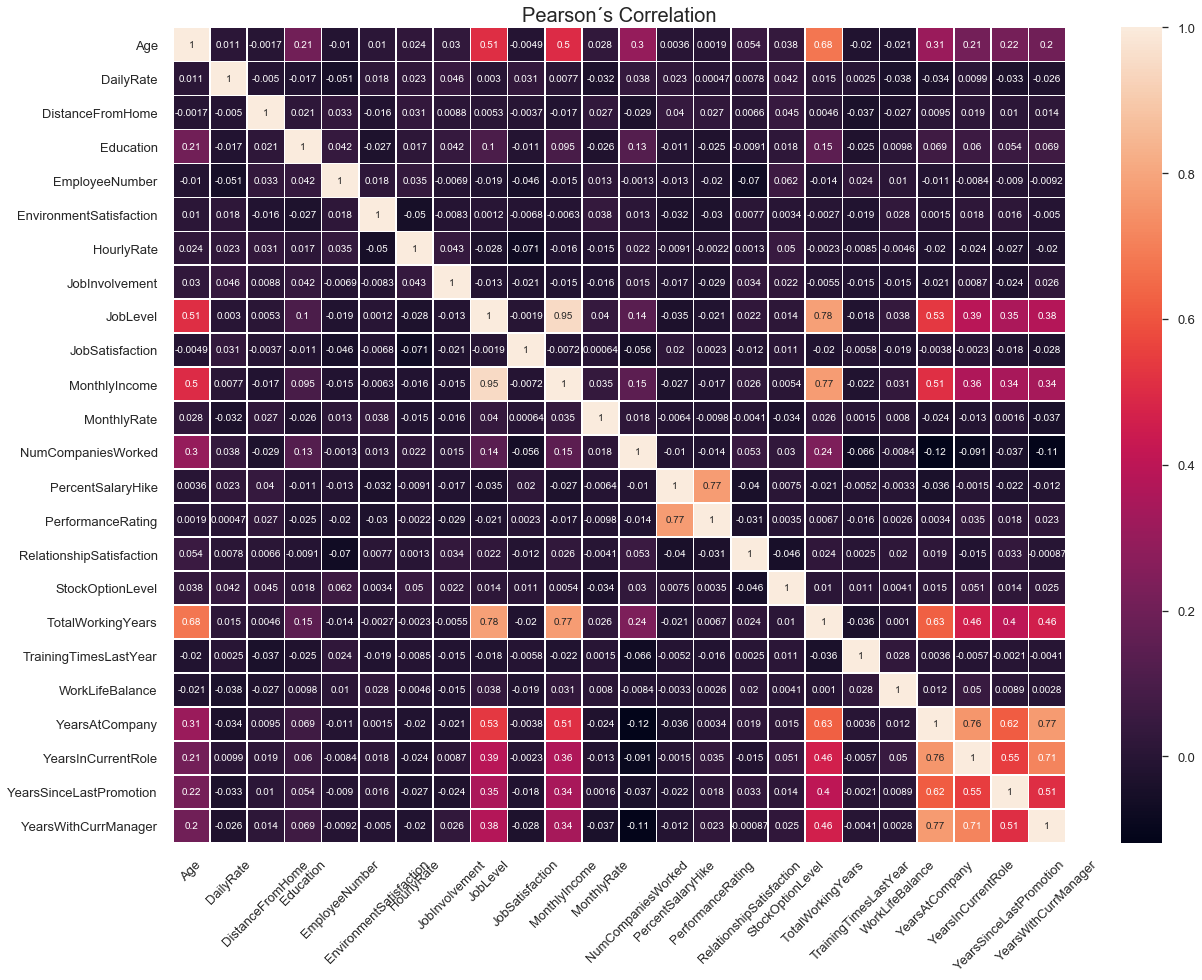

In [9]:
dt = data.drop(["EmployeeCount", "StandardHours"], axis=1)

d_corr = dt.corr()

plt.figure(figsize=(20,15))
fig = sns.heatmap(d_corr, annot=True, annot_kws={"size": 10}, linewidths=.5)
plt.title("Pearson´s Correlation", fontsize=20)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=45)
plt.show()

In [10]:
cor_list = []
threshold = 0.7

l = len(d_corr)

for i in range(l):
    for j in range(i+1, l):
        if (d_corr.iloc[i,j]>threshold and d_corr.iloc[i,j]<1) or (d_corr.iloc[i,j]<-threshold and d_corr.iloc[i,j]<0):
            cor_list.append([i, j,d_corr.iloc[i,j]])

In [11]:
s_cor = sorted(cor_list, key=lambda x: abs(x[2]))
c  = d_corr.columns.values

for i, j, v  in s_cor:
    print(f"Feature {c[i]} and feature {c[j]} with a correlation: {v}")

Feature YearsInCurrentRole and feature YearsWithCurrManager with a correlation: 0.7143647616385903
Feature YearsAtCompany and feature YearsInCurrentRole with a correlation: 0.7587537366134616
Feature YearsAtCompany and feature YearsWithCurrManager with a correlation: 0.7692124251006991
Feature MonthlyIncome and feature TotalWorkingYears with a correlation: 0.7728932462543548
Feature PercentSalaryHike and feature PerformanceRating with a correlation: 0.7735499964012668
Feature JobLevel and feature TotalWorkingYears with a correlation: 0.7822078045362802
Feature JobLevel and feature MonthlyIncome with a correlation: 0.950299913479854


#### Visualizations of features

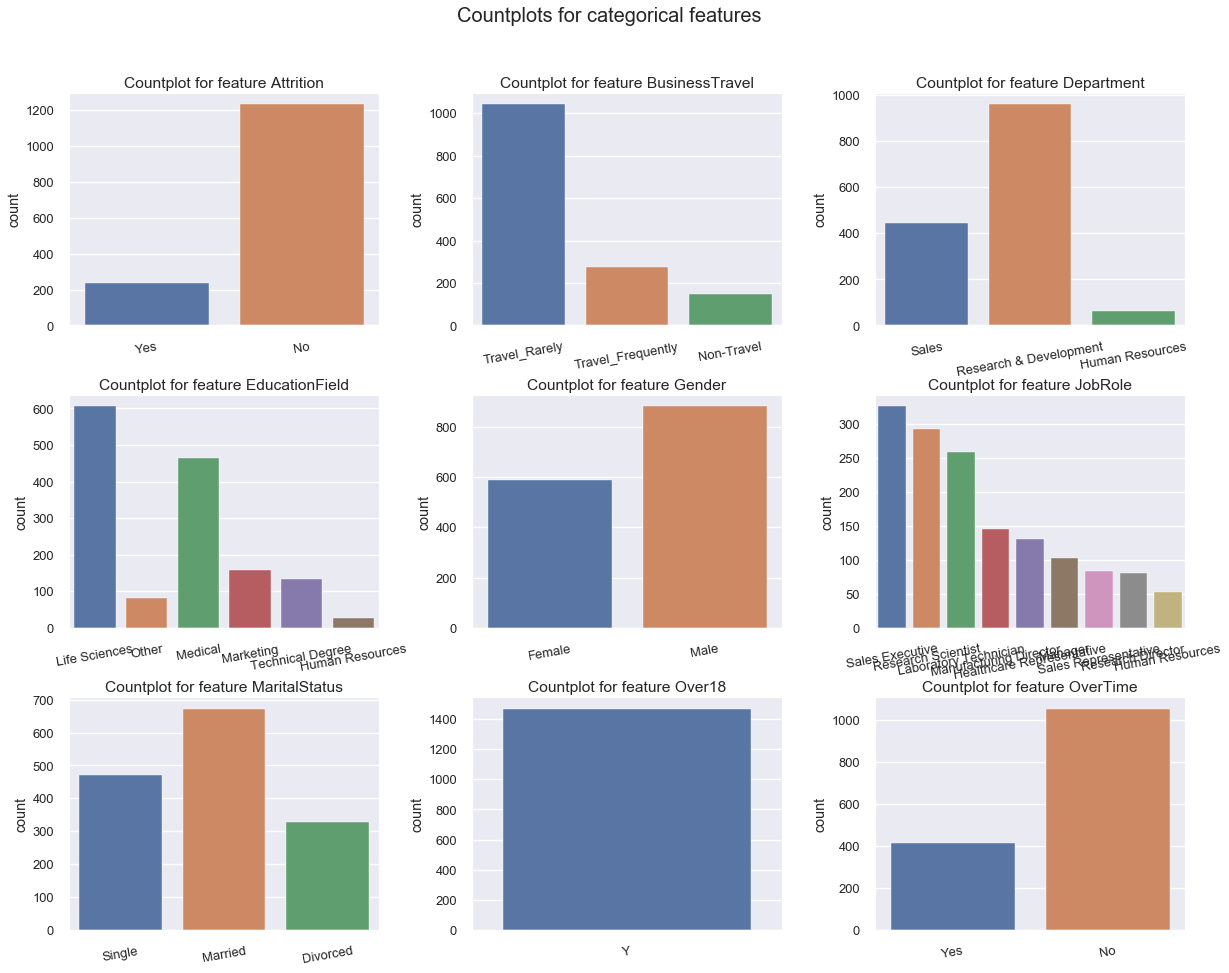

In [12]:
dobj = data[obj_f]

plt.subplots(3,3, figsize=(20,15))

for i in range(len(obj_f)):
    plt.subplot(3,3, i+1)
    g  = sns.countplot(data=dobj, x=dobj.iloc[:,i])
    plt.title(f"Countplot for feature {obj_f[i]}")
    plt.xticks(rotation=10)
    g.set(xlabel=None)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3,top = 0.9)
    plt.suptitle("Countplots for categorical features", fontsize=20)
plt.show()

In [13]:
dn = data[num_f]

cn = dn.columns.values

for i in range(len(num_f)):
    print(f"Feature '{cn[i]}' with number of {dn.iloc[:,i].nunique()} unique values")

Feature 'Age' with number of 43 unique values
Feature 'DailyRate' with number of 886 unique values
Feature 'DistanceFromHome' with number of 29 unique values
Feature 'Education' with number of 5 unique values
Feature 'EmployeeCount' with number of 1 unique values
Feature 'EmployeeNumber' with number of 1470 unique values
Feature 'EnvironmentSatisfaction' with number of 4 unique values
Feature 'HourlyRate' with number of 71 unique values
Feature 'JobInvolvement' with number of 4 unique values
Feature 'JobLevel' with number of 5 unique values
Feature 'JobSatisfaction' with number of 4 unique values
Feature 'MonthlyIncome' with number of 1349 unique values
Feature 'MonthlyRate' with number of 1427 unique values
Feature 'NumCompaniesWorked' with number of 10 unique values
Feature 'PercentSalaryHike' with number of 15 unique values
Feature 'PerformanceRating' with number of 2 unique values
Feature 'RelationshipSatisfaction' with number of 4 unique values
Feature 'StandardHours' with number 

In [14]:
n_list = []

for i in range(len(cn)):
    if dn.iloc[:,i].nunique()<6:
        n_list.append(i)
print(f" Features with less than 6 unique values: {cn[n_list]}")

 Features with less than 6 unique values: ['Education' 'EmployeeCount' 'EnvironmentSatisfaction' 'JobInvolvement'
 'JobLevel' 'JobSatisfaction' 'PerformanceRating'
 'RelationshipSatisfaction' 'StandardHours' 'StockOptionLevel'
 'WorkLifeBalance']


In [15]:
dtn = dn[['Education', 'EmployeeCount' ,'EnvironmentSatisfaction', 'JobInvolvement',
 'JobLevel' ,'JobSatisfaction', 'PerformanceRating',
 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
 'WorkLifeBalance']]

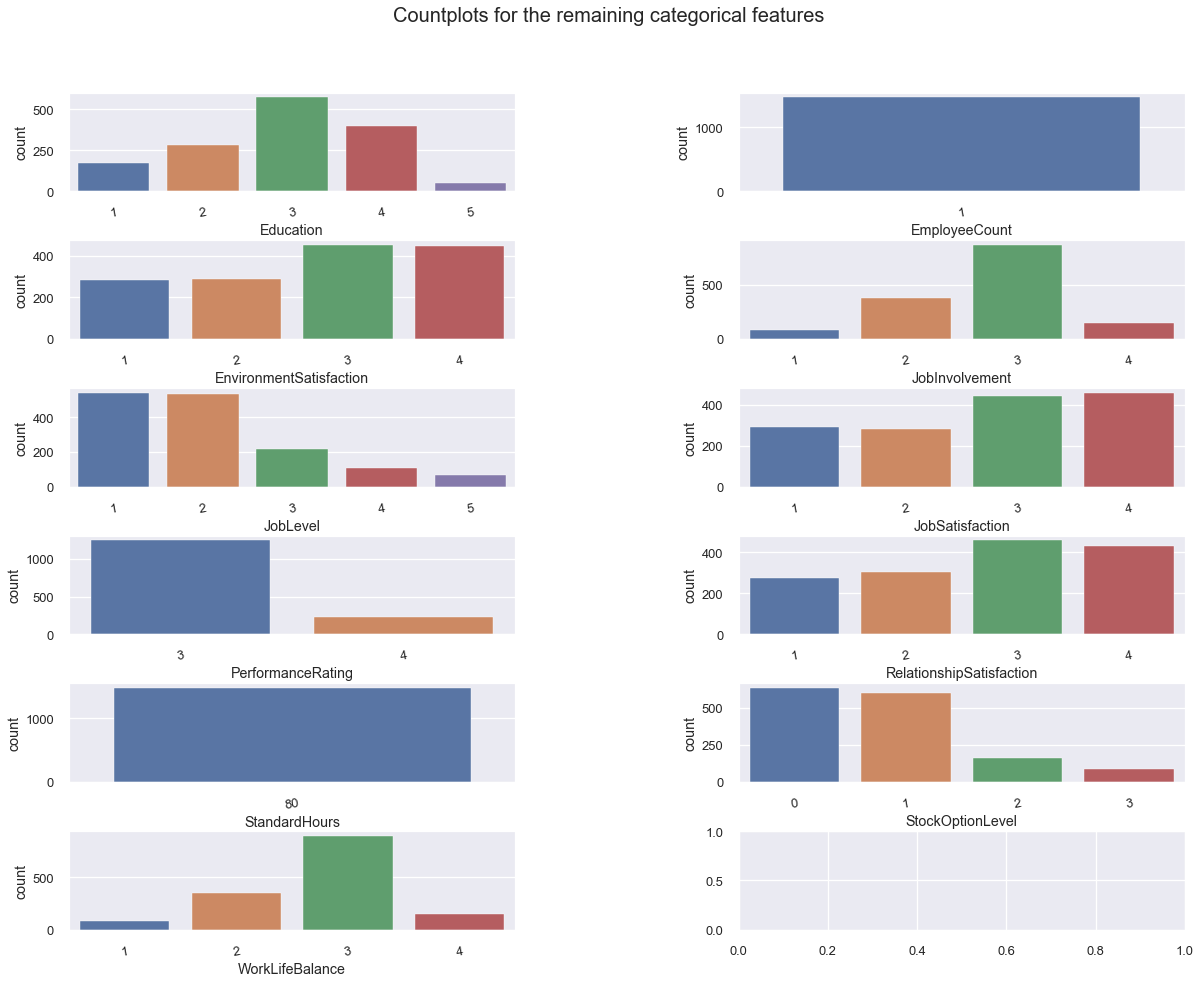

In [16]:
plt.subplots(6,2, figsize=(20,15))

for i in range(len(n_list)):
    plt.subplot(6,2, i+1)
    sns.countplot(data=dtn, x=dtn.iloc[:,i])
    plt.xticks(rotation=10)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.9)
    plt.suptitle("Countplots for the remaining categorical features", fontsize=20)
plt.show()

In [17]:
b = dtn.columns.values
c = set(b)
d = set(num_f)
snum2 = d - c

print(f"Set of features with unique values > 6: {snum2}")
print(f"Sanity check for lenghts: {len(num_f) == (len(snum2) + len(c))}")

Set of features with unique values > 6: {'YearsWithCurrManager', 'MonthlyRate', 'YearsAtCompany', 'PercentSalaryHike', 'HourlyRate', 'DailyRate', 'YearsInCurrentRole', 'EmployeeNumber', 'YearsSinceLastPromotion', 'MonthlyIncome', 'TrainingTimesLastYear', 'DistanceFromHome', 'Age', 'TotalWorkingYears', 'NumCompaniesWorked'}
Sanity check for lenghts: True


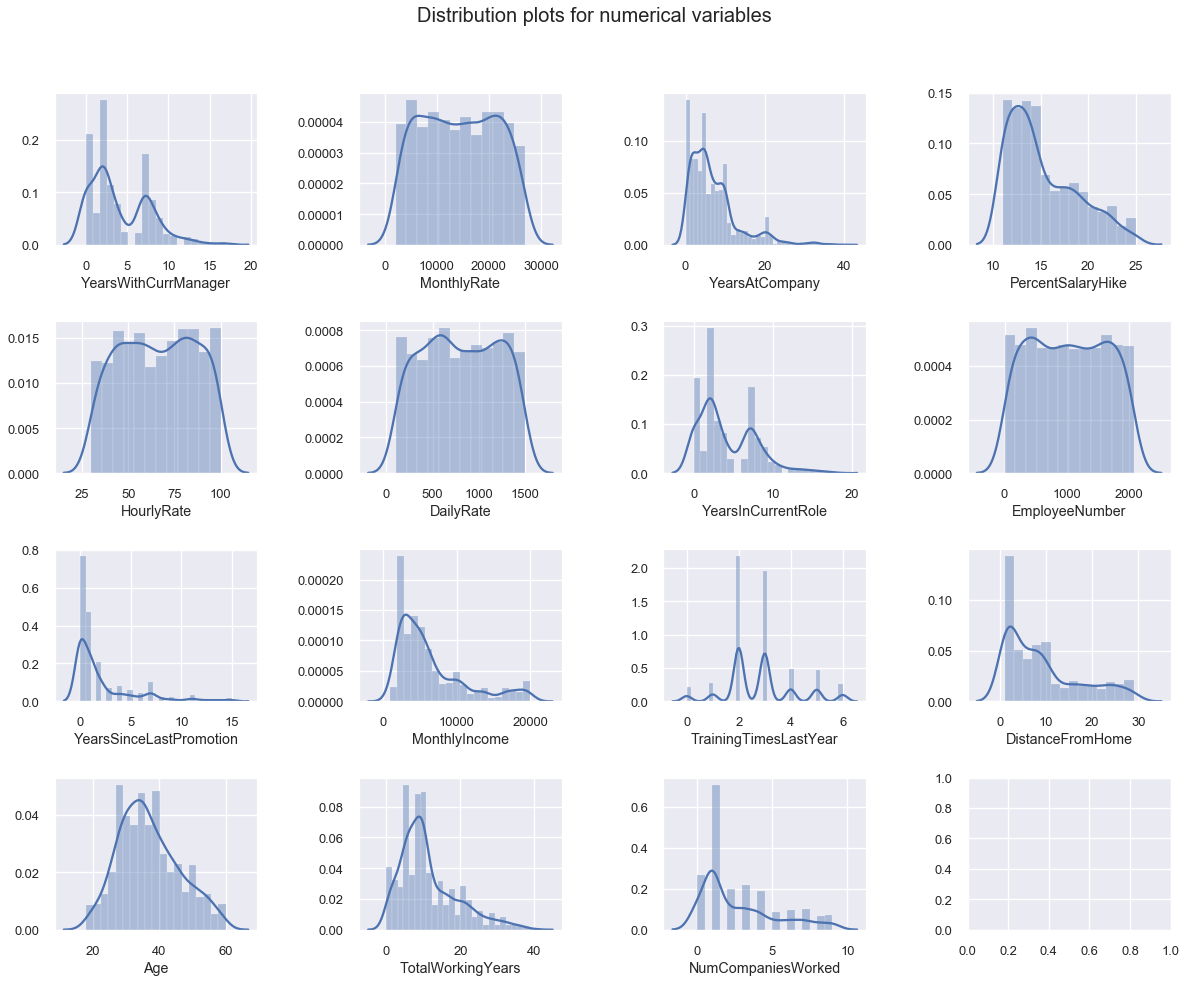

In [18]:
dt2 = data.loc[:,snum2]

plt.subplots(4,4, figsize=(20,15))

for i in range(len(snum2)):
    plt.subplot(4,4, i+1)
    sns.distplot(dt2.iloc[:,i])
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.9)
    plt.suptitle("Distribution plots for numerical variables", fontsize=20)
plt.show()
    

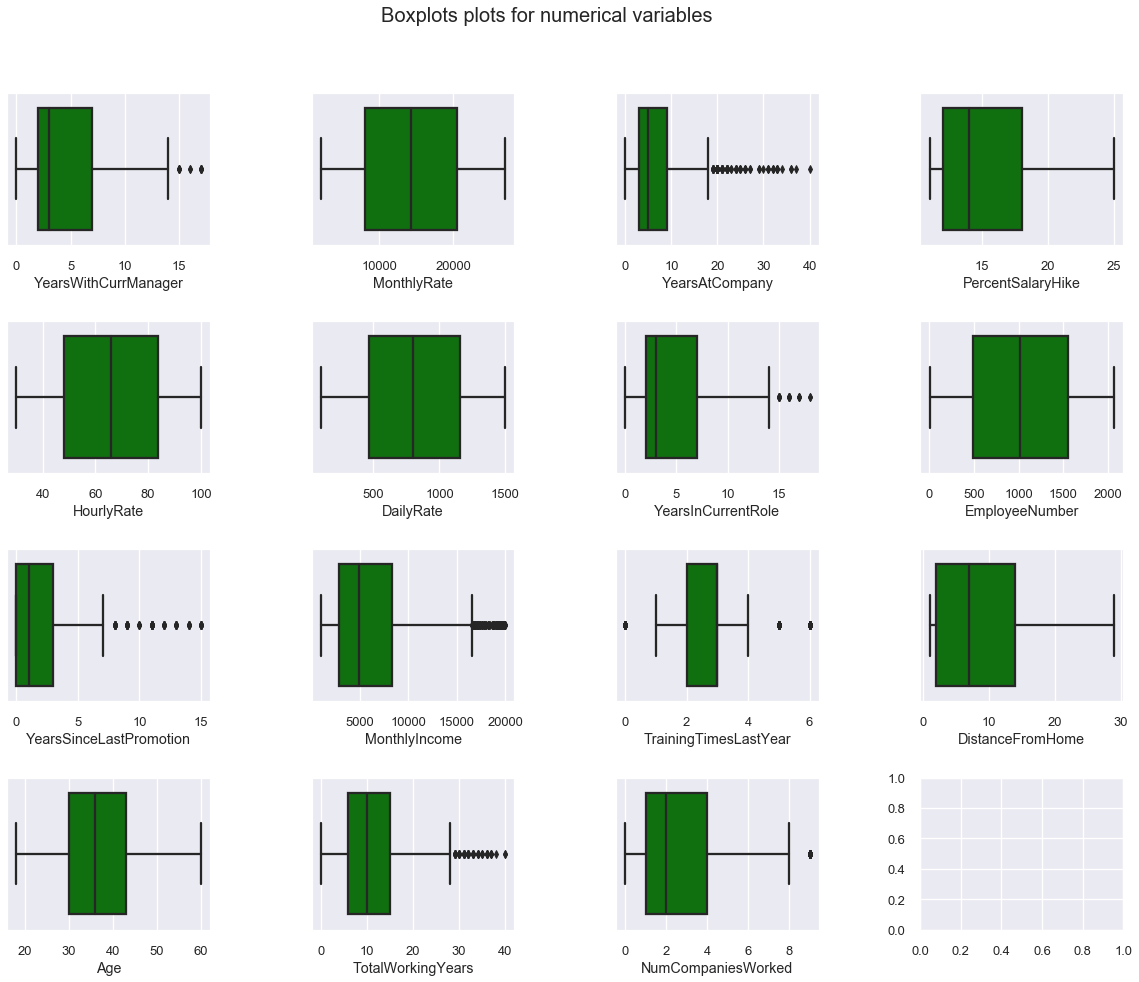

In [19]:
plt.subplots(4,4, figsize=(20,15))

for i in range(len(snum2)):
    plt.subplot(4,4, i+1)
    sns.boxplot(dt2.iloc[:,i], color="green")
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.9)
    plt.suptitle("Boxplots plots for numerical variables", fontsize=20)
plt.show()

#### Distribution for y its relations as hue with x´s 

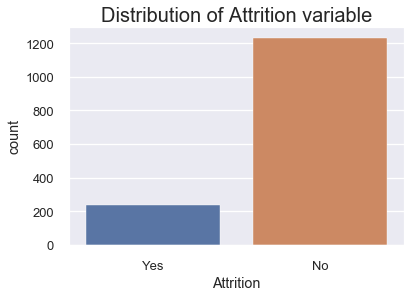

In [20]:
sns.countplot(data["Attrition"])
plt.title("Distribution of Attrition variable", fontsize=20)
plt.show()

In [21]:
print(f"{data['Attrition'].value_counts([0])}")

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


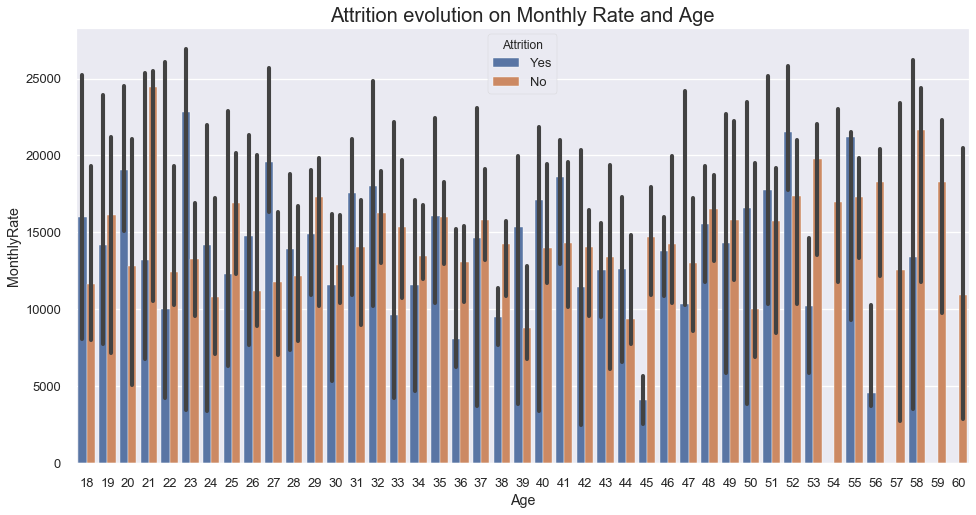

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(x="Age", y="MonthlyRate", hue="Attrition", data=data, estimator=median)
plt.title("Attrition evolution on Monthly Rate and Age", fontsize=20)
plt.show()

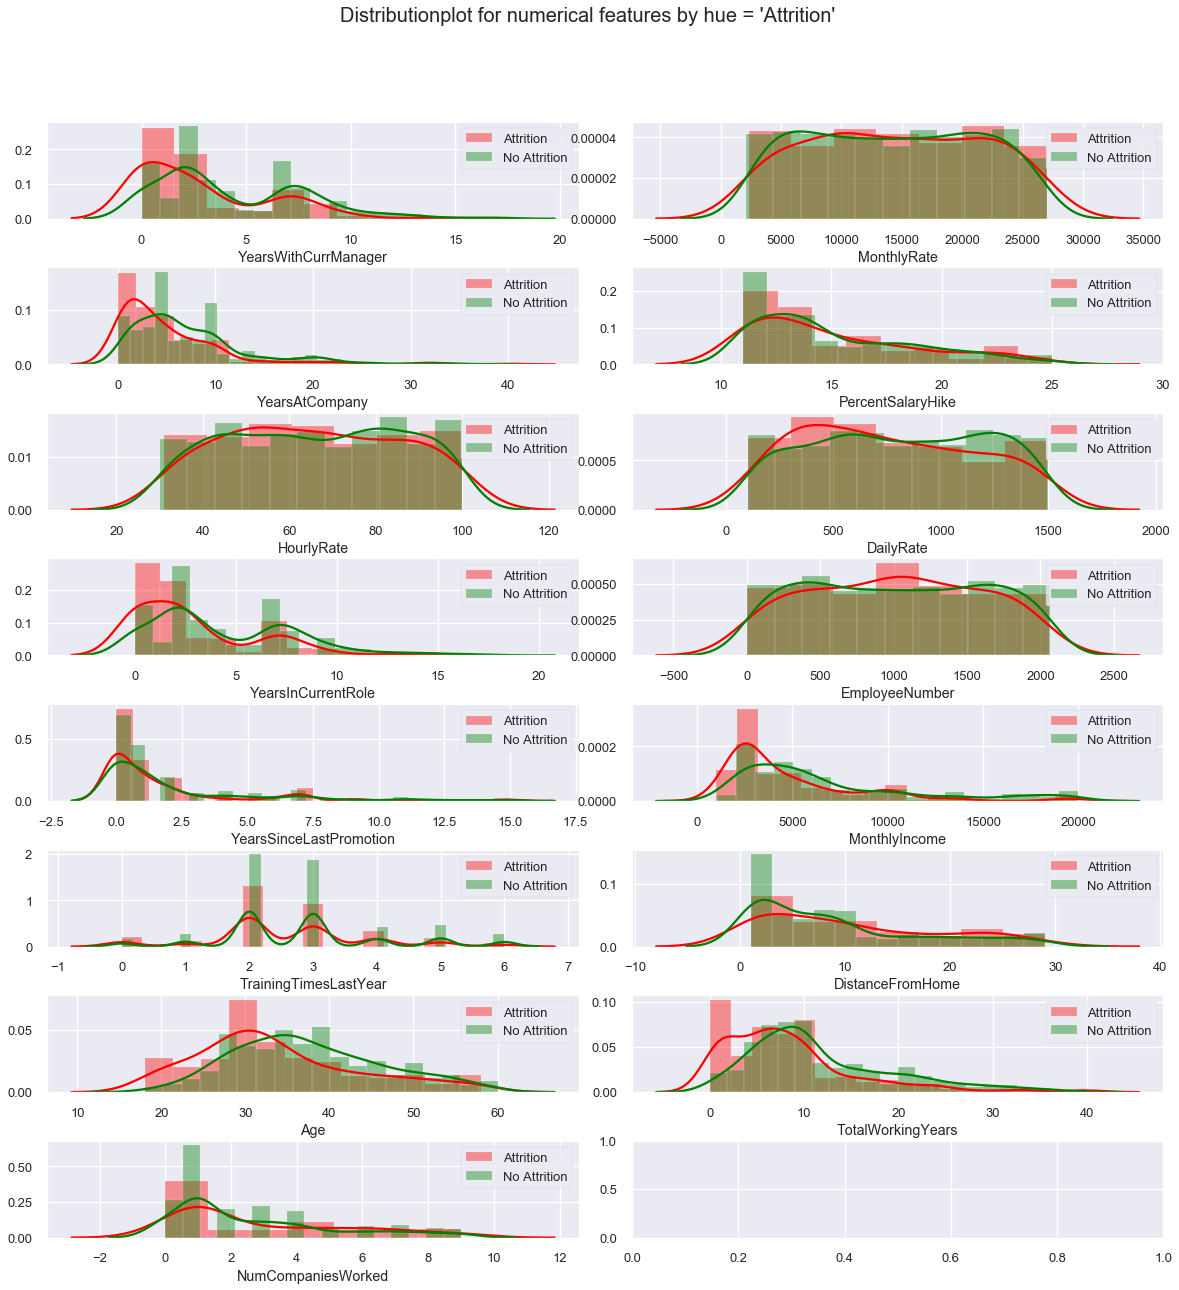

In [23]:
plt.subplots(8,2, figsize=(20,20))

for i in range(len(snum2)):
    plt.subplot(8,2, i+1)
    sns.distplot(dt2[data["Attrition"]=="Yes"].iloc[:,i], color="red", label="Attrition" )
    sns.distplot(dt2[data["Attrition"]=="No"].iloc[:,i], color="green", label="No Attrition")
    plt.legend()
    plt.subplots_adjust(wspace = 0.1, hspace = 0.5,top = 0.9)
    plt.suptitle("Distributionplot for numerical features by hue = 'Attrition'", fontsize=20)
plt.show()

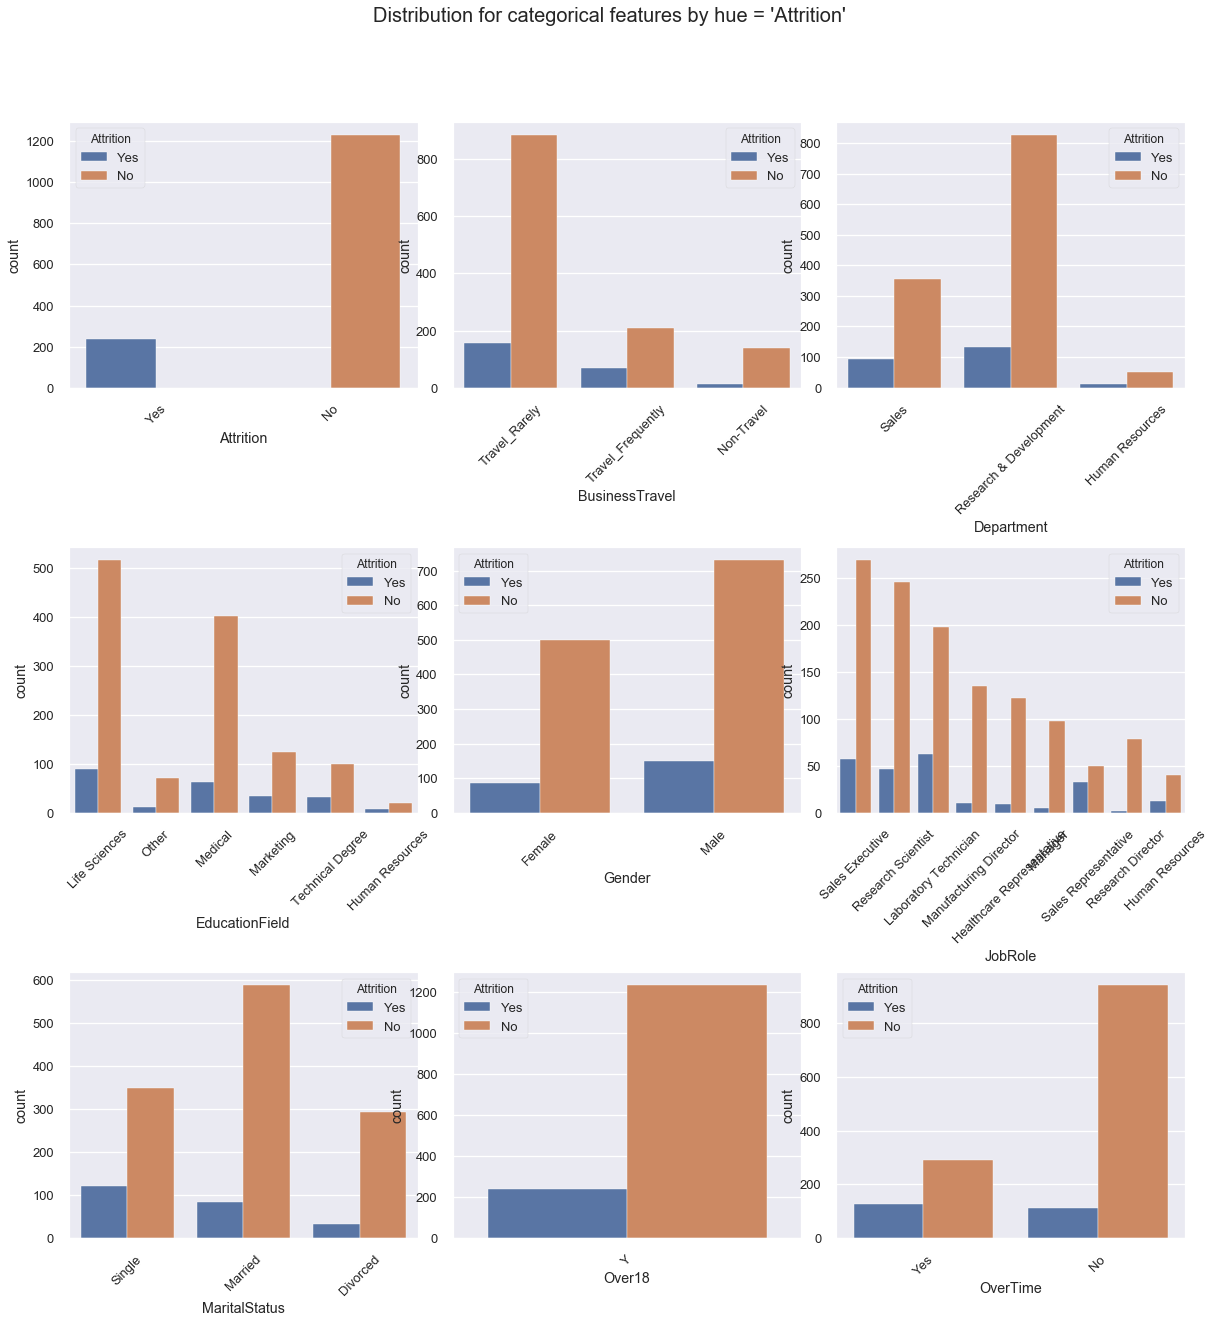

In [24]:
plt.subplots(3,3, figsize=(20,20))

for i in range(dobj.shape[1]):
    plt.subplot(3,3, i+1)
    sns.countplot(dobj.iloc[:,i], hue=dobj["Attrition"])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)
    plt.xticks(rotation=45)
    plt.suptitle("Distribution for categorical features by hue = 'Attrition'", fontsize=20)
plt.show()

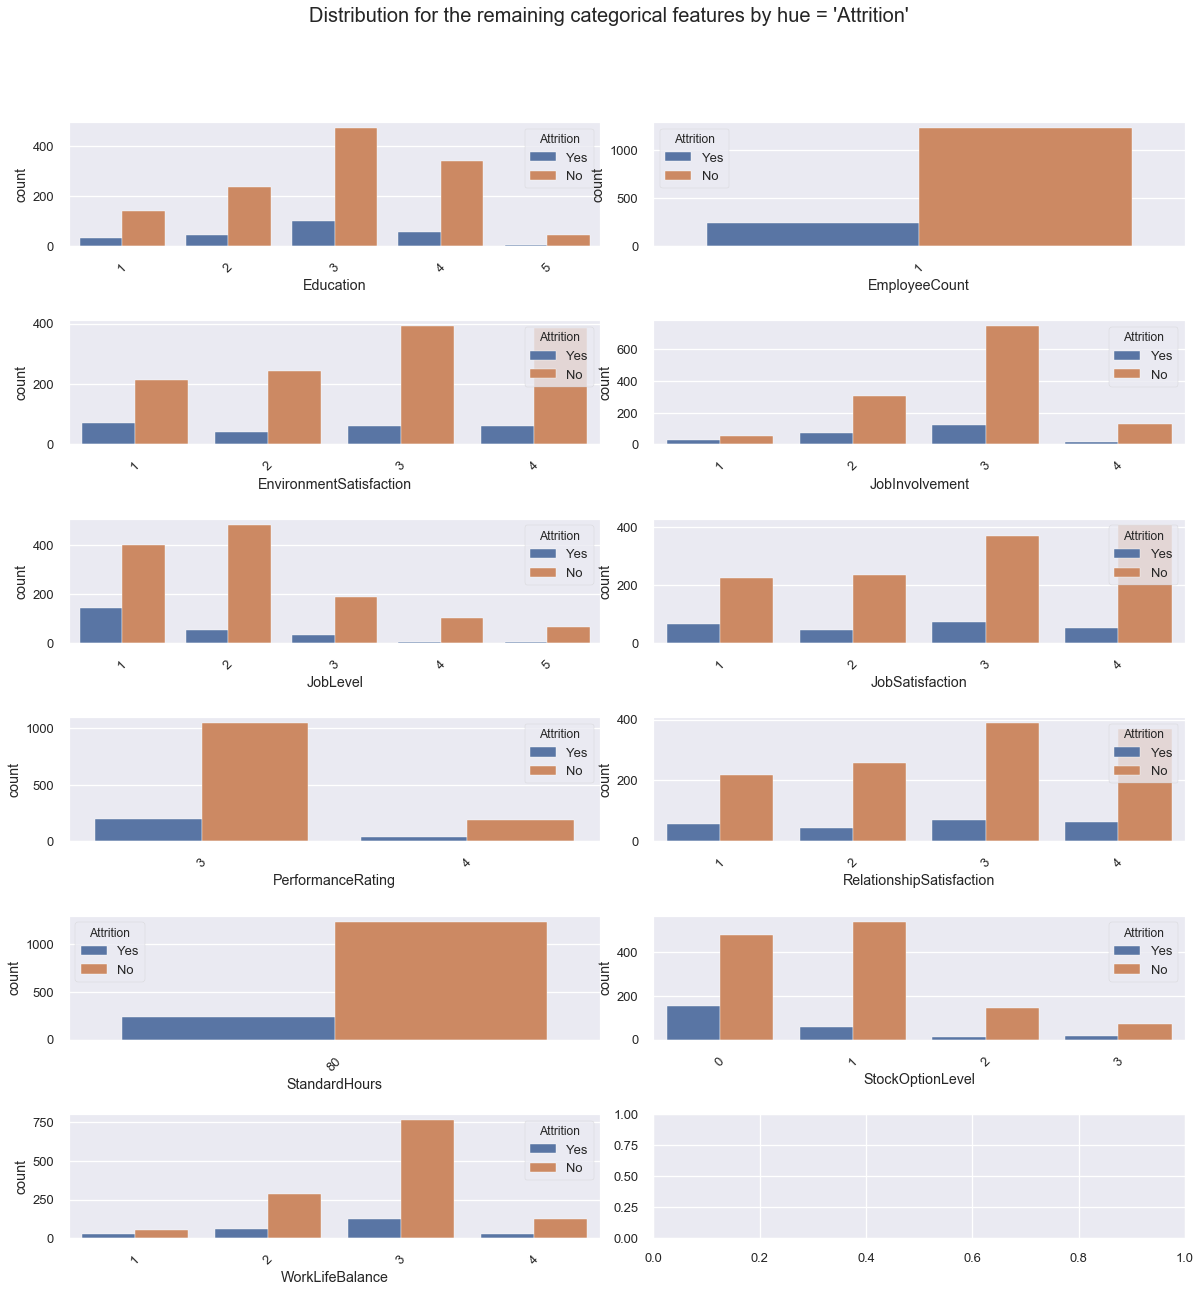

In [25]:
plt.subplots(6,2, figsize=(20,20))

for i in range(dtn.shape[1]):
    plt.subplot(6,2, i+1)
    sns.countplot(dtn.iloc[:,i], hue=data["Attrition"])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)
    plt.xticks(rotation=45)
    plt.suptitle("Distribution for the remaining categorical features by hue = 'Attrition'", fontsize=20)
plt.show()

#### Exploring interactions between two variables

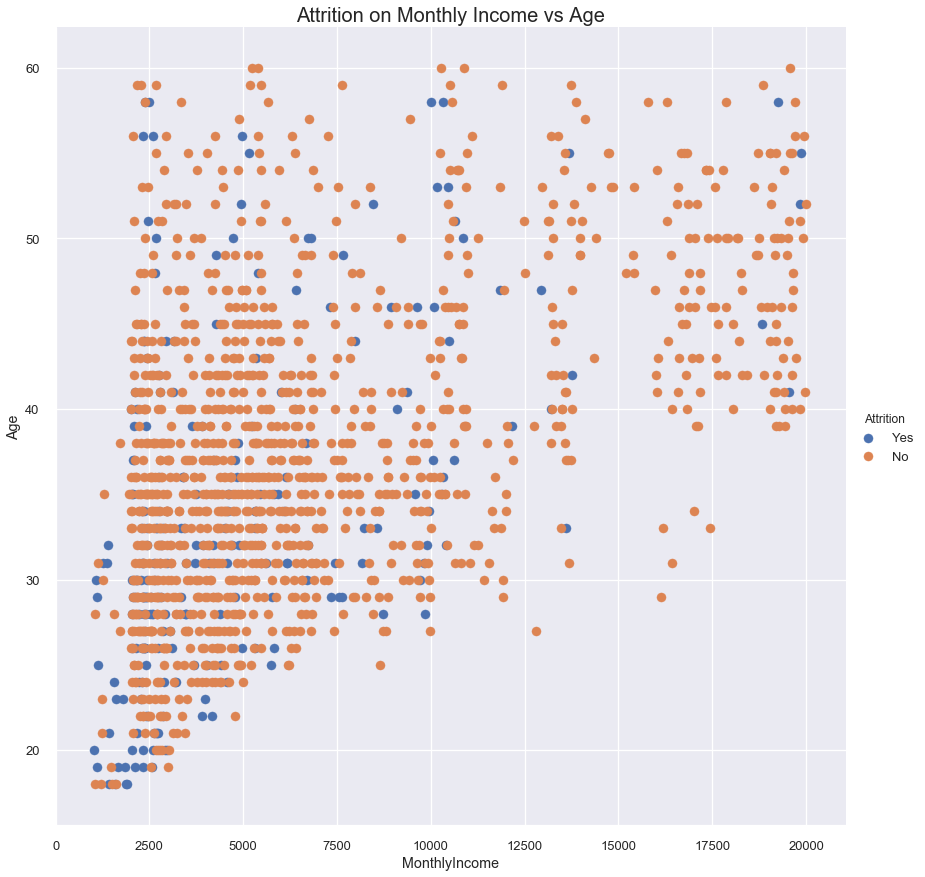

In [26]:
sns.FacetGrid(data=data, hue="Attrition", size=12)\
    .map(plt.scatter, "MonthlyIncome", "Age")\
    .add_legend()
plt.title("Attrition on Monthly Income vs Age", fontsize=20)
plt.show()

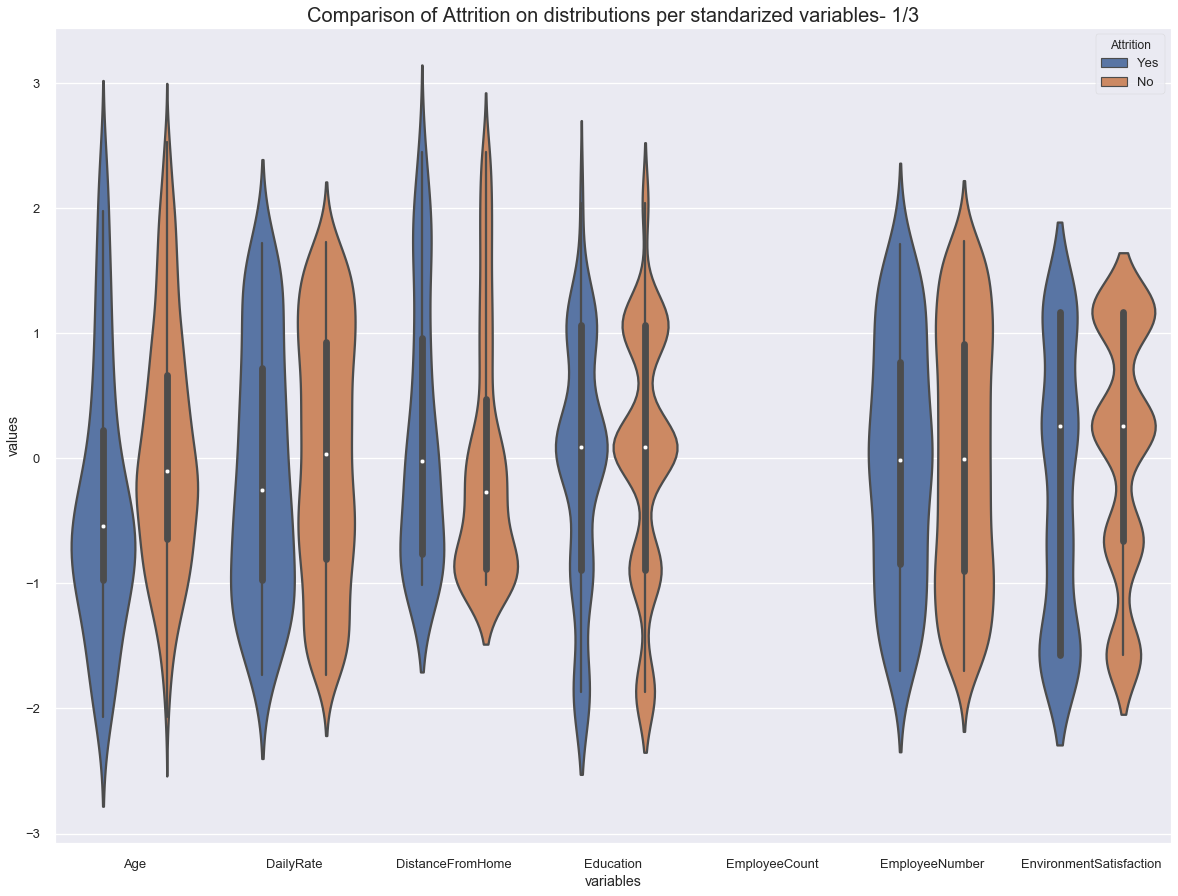

In [27]:
nd = data[num_f]

d4_s = (nd - nd.mean()) / (nd.std())
d4 = pd.concat([data["Attrition"], d4_s], axis=1)

data_melt = pd.melt(d4.iloc[:,0:8], id_vars="Attrition", var_name="variables", value_name="values")

plt.figure(figsize=(20,15))
sns.violinplot(x="variables", y="values", hue="Attrition", data=data_melt)
plt.title("Comparison of Attrition on distributions per standarized variables- 1/3", fontsize=20)
plt.show()

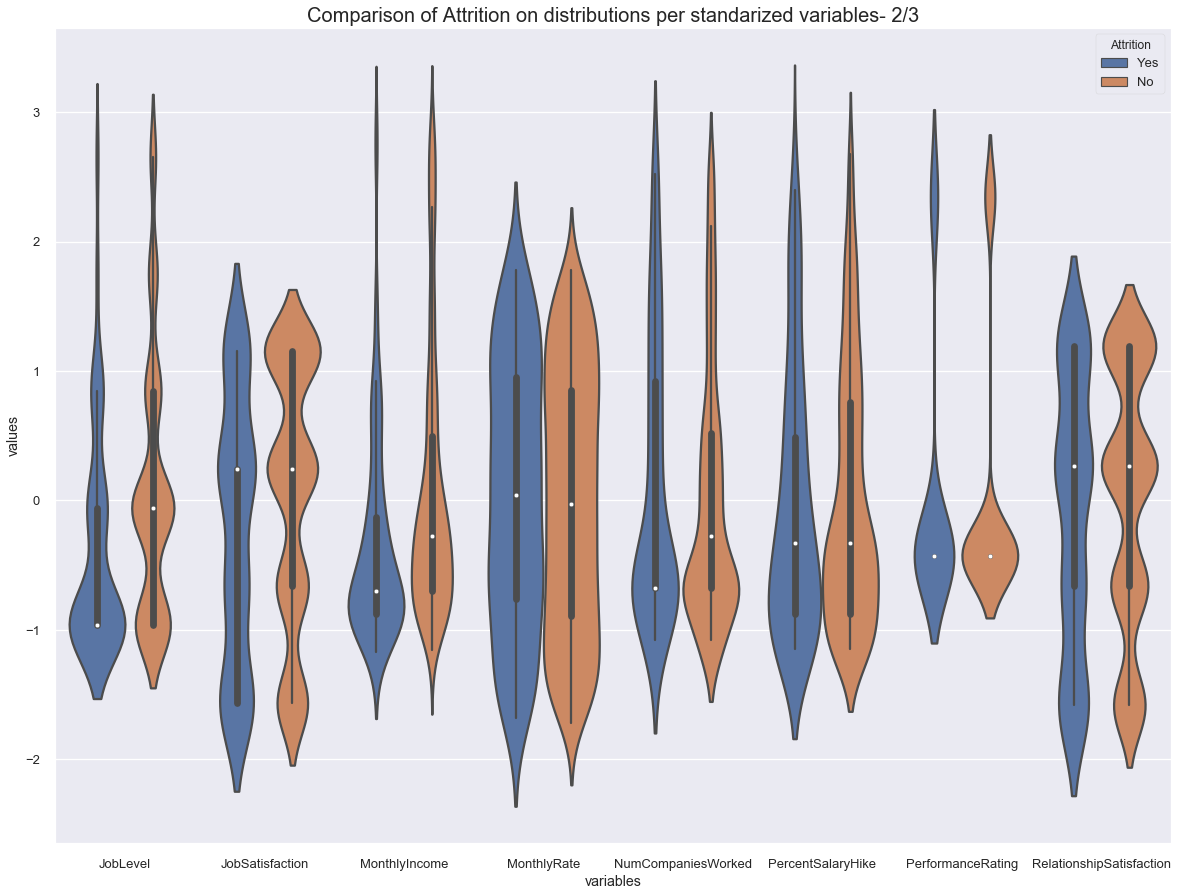

In [28]:
d5 = pd.concat([data["Attrition"], d4_s.iloc[:,9:17]], axis=1)

data_melt = pd.melt(d5, id_vars="Attrition", var_name="variables", value_name="values")

plt.figure(figsize=(20,15))
sns.violinplot(x="variables", y="values", hue="Attrition", data=data_melt)
plt.title("Comparison of Attrition on distributions per standarized variables- 2/3", fontsize=20)
plt.show()

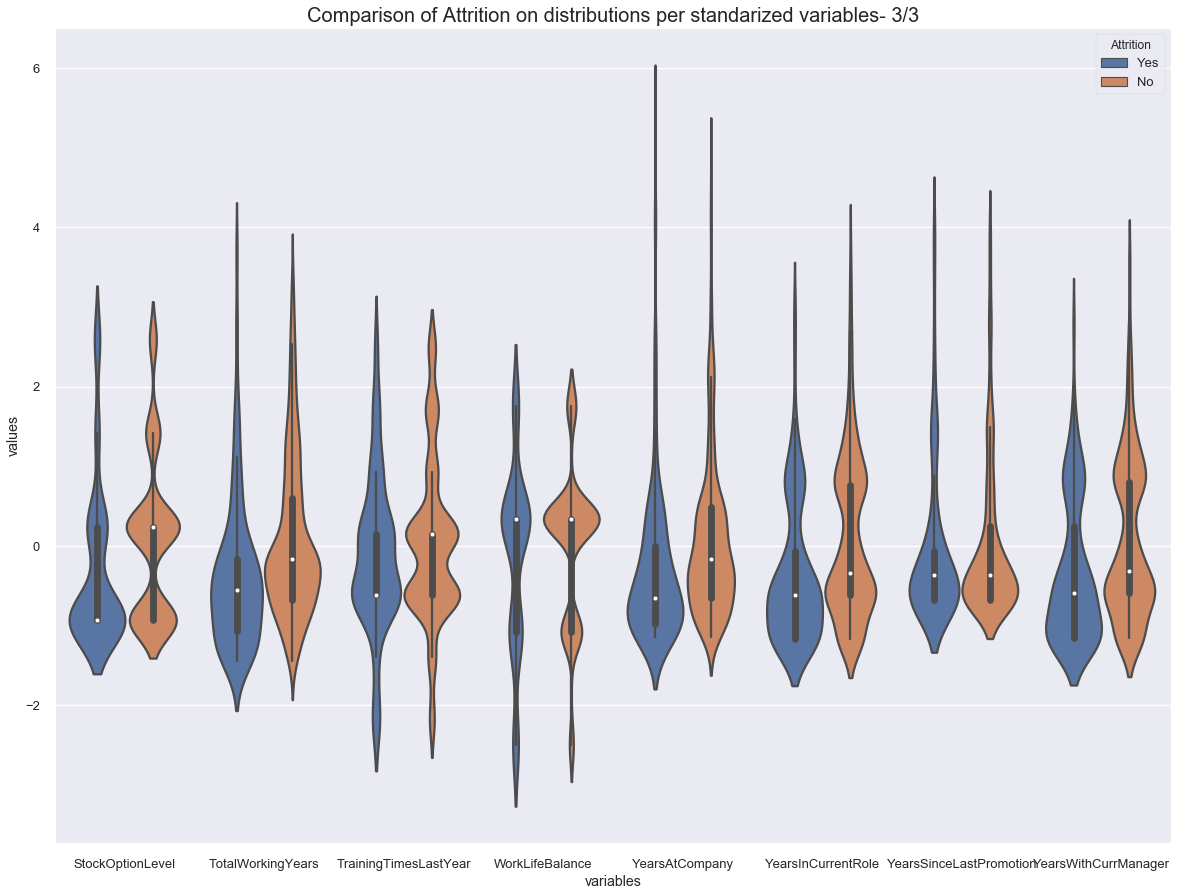

In [29]:
d6 = pd.concat([data["Attrition"], d4_s.iloc[:,18:26]],  axis=1)

data_melt = pd.melt(d6, id_vars="Attrition", var_name="variables", value_name="values")

plt.figure(figsize=(20,15))
sns.violinplot(x="variables", y="values", hue="Attrition", data=data_melt)
plt.title("Comparison of Attrition on distributions per standarized variables- 3/3", fontsize=20)
plt.show()

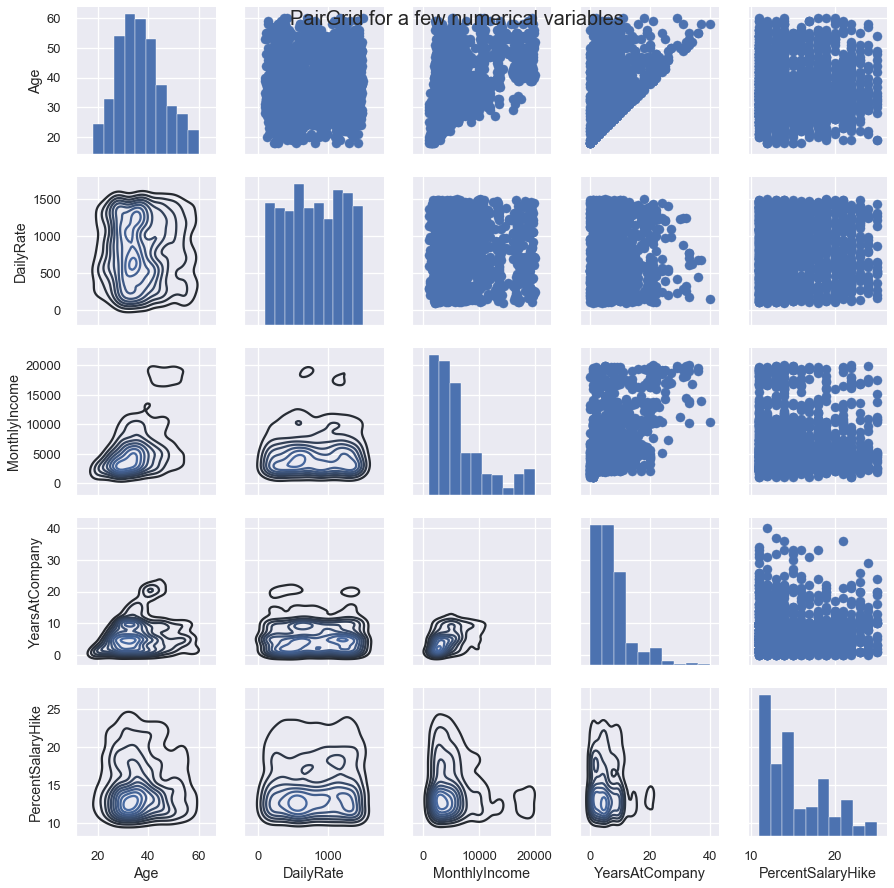

In [30]:
g = sns.PairGrid(nd.loc[:,['Age','DailyRate', 'MonthlyIncome', 'YearsAtCompany', 'PercentSalaryHike']], diag_sharey=False)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, lw=3)
plt.suptitle("PairGrid for a few numerical variables", fontsize=20)
plt.show()

## 3.-  PRINCIPAL COMPONENT ANALYSIS (PCA) & T-DISTRIBUTED STOCHASTIC NEIGHBOURING ENTITIES (T-SNE)



Our aim is to project the data into a 2 dimensional space by applying PCA with the components where these are orthogonal
one each other mantaining the greater variance for the first one. As these dataset only has 35  features, there is no need to compress it. Only we are curious about plotting the two uncorrelated components coloring the y variable.
I cannot see a very clear pattern in the distribution of the y values (red=1 / blue=0) within the following scatterplot.

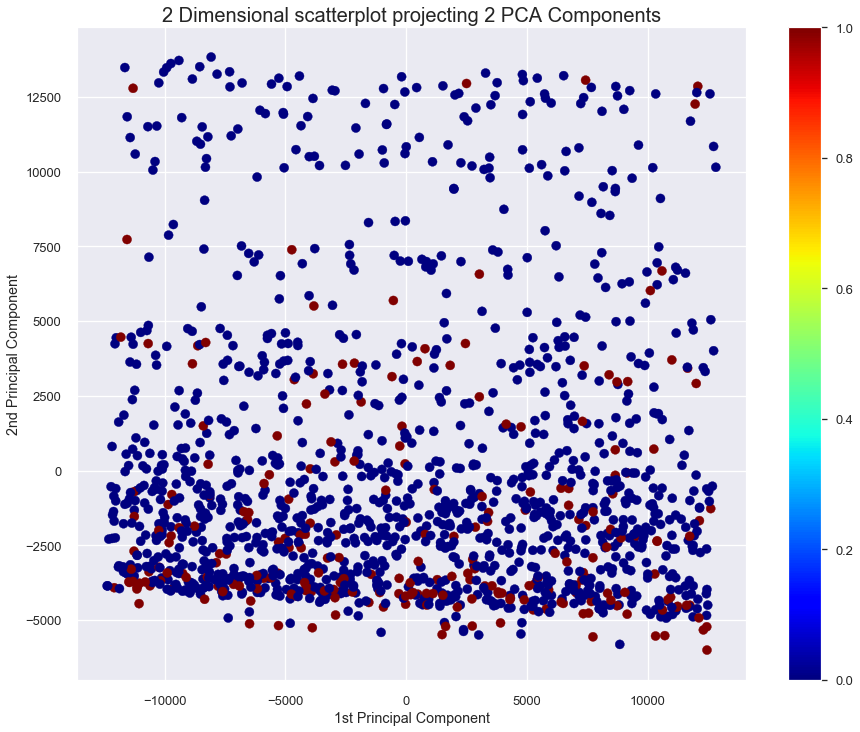

In [31]:
X = data[num_f]
y = data["Attrition"].map(lambda x: 1 if x=="Yes" else 0)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(15,12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("2 Dimensional scatterplot projecting 2 PCA Components", fontsize=20)
plt.show()


We are going to apply TSNE as well in order to check if there is any clear distribution of the data points depending on the hue (our target "Attrition"). This statistical technique matches the distribution that comes from the pairwise distances in the original data and the distribution of the pairwise similarities but in the low-dimensional space.
In this case, I cannot see clear clusters of points belonging only to their corresponding hue.


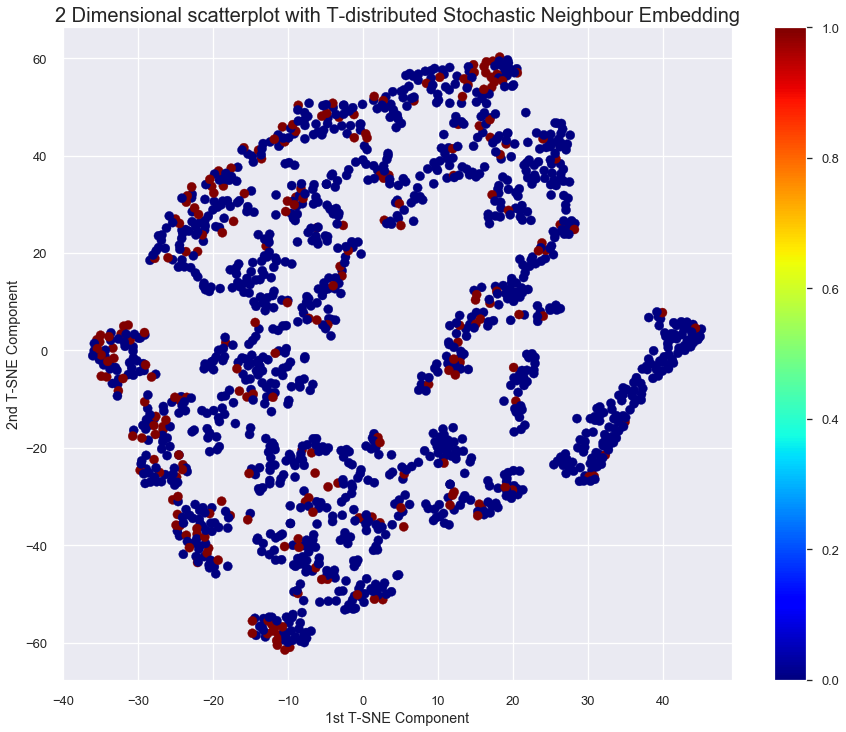

In [32]:
tsne = TSNE(random_state=43)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(15,12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet') 
plt.colorbar()
plt.xlabel("1st T-SNE Component")
plt.ylabel("2nd T-SNE Component")
plt.title("2 Dimensional scatterplot with T-distributed Stochastic Neighbour Embedding", fontsize=20)
plt.show()

In [33]:
for i, component  in enumerate(pca.components_):
    print(f"{i} Component and {round(pca.explained_variance_ratio_[i], 4)} explained variance:")
    print(" + ".join (f"{round(value, 4)} {name}"
        for value, name in zip(component, X.columns.values)))

0 Component and 0.6913 explained variance:
0.0001 Age + -0.0018 DailyRate + 0.0 DistanceFromHome + -0.0 Education + -0.0 EmployeeCount + 0.001 EmployeeNumber + 0.0 EnvironmentSatisfaction + -0.0 HourlyRate + -0.0 JobInvolvement + 0.0 JobLevel + 0.0 JobSatisfaction + 0.0408 MonthlyIncome + 0.9992 MonthlyRate + 0.0 NumCompaniesWorked + -0.0 PercentSalaryHike + -0.0 PerformanceRating + -0.0 RelationshipSatisfaction + 0.0 StandardHours + -0.0 StockOptionLevel + 0.0001 TotalWorkingYears + 0.0 TrainingTimesLastYear + 0.0 WorkLifeBalance + -0.0 YearsAtCompany + -0.0 YearsInCurrentRole + 0.0 YearsSinceLastPromotion + -0.0 YearsWithCurrManager
1 Component and 0.3015 explained variance:
0.001 Age + 0.0008 DailyRate + -0.0 DistanceFromHome + 0.0 Education + -0.0 EmployeeCount + -0.002 EmployeeNumber + -0.0 EnvironmentSatisfaction + -0.0001 HourlyRate + -0.0 JobInvolvement + 0.0002 JobLevel + -0.0 JobSatisfaction + 0.9992 MonthlyIncome + -0.0408 MonthlyRate + 0.0001 NumCompaniesWorked + -0.0 Perce

##  4.- DATA PREPARATION

#### Removal of not useful features

In [34]:
# Removal of columns

    # Features with the same values (nunique()<2)

rem_cols = data.nunique()[data.nunique()<2].keys().tolist()
print(f"Features with nunique()<2 to be removed: {rem_cols}")
data = data.drop(rem_cols, axis=1)

    # Dependent variable (Attrition)

y = data["Attrition"].map(lambda x: 1 if x=="Yes" else 0)
data = data.drop("Attrition", axis=1)

    # Feature with Pearson´s correlation > 0.8

filt_corr = [x for x in s_cor if x[2]>0.8]
print(f"Features with greater Pearson´s correlation to be removed: {filt_corr}")

data = data.drop(["JobLevel"], axis=1)



Features with nunique()<2 to be removed: ['EmployeeCount', 'Over18', 'StandardHours']
Features with greater Pearson´s correlation to be removed: [[8, 10, 0.950299913479854]]


#### Label encoding for categorical variables

Label encoding for categorical variables. Some features has an ordinal sense whereas others not and therefore, to me it is not clear if I should be choosing One-Hot Encoding or Label Encoding.

In [35]:
cols = data.columns.values

cat_v=[]

for i in cols:
    if data[i].dtypes!="int64":
        cat_v.append(i) 

print(f"Categorical features: {cat_v}")

label = LabelEncoder()
for i in cat_v:
    data[i] = label.fit_transform(data[i])

Categorical features: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


####  Standarization of data

In [36]:
scaler=StandardScaler()
ndt = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
ndt.describe()

Age  BusinessTravel     DailyRate    Department  \
count  1.470000e+03    1.470000e+03  1.470000e+03  1.470000e+03   
mean  -3.504377e-17   -6.042030e-17  5.075305e-17 -1.353415e-16   
std    1.000340e+00    1.000340e+00  1.000340e+00  1.000340e+00   
min   -2.072192e+00   -2.416437e+00 -1.736576e+00 -2.389147e+00   
25%   -7.581700e-01   -9.131944e-01 -8.366616e-01 -4.938171e-01   
50%   -1.011589e-01    5.900483e-01 -1.204135e-03 -4.938171e-01   
75%    6.653541e-01    5.900483e-01  8.788772e-01  1.401512e+00   
max    2.526886e+00    5.900483e-01  1.726730e+00  1.401512e+00   

       DistanceFromHome     Education  EducationField  EmployeeNumber  \
count      1.470000e+03  1.470000e+03    1.470000e+03    1.470000e+03   
mean       4.350262e-17  7.008755e-17    3.866899e-17   -1.546760e-16   
std        1.000340e+00  1.000340e+00    1.000340e+00    1.000340e+00   
min       -1.010909e+00 -1.868426e+00   -1.688776e+00   -1.701283e+00   
25%       -8.875151e-01 -8.916883e-01   -9.374137e-01   -8.866700e-01   
50%       -2.705440e-01  8.504925e-02   -1.860516e-01   -7.253514e-03   
75%        5.932157e-01  1.061787e+00    5.653105e-01    8.821327e-01   
max        2.444129e+00  2.038524e+00    2.068035e+00    1.733302e+00   

       EnvironmentSatisfaction        Gender    HourlyRate  JobInvolvement  \
count             1.470000e+03  1.470000e+03  1.470000e+03    1.470000e+03   
mean              1.305078e-16  4.350262e-17  1.691768e-16    6.525392e-17   
std               1.000340e+00  1.000340e+00  1.000340e+00    1.000340e+00   
min              -1.575686e+00 -1.224745e+00 -1.766079e+00   -2.432006e+00   
25%              -6.605307e-01 -1.224745e+00 -8.803615e-01   -1.026167e+00   
50%               2.546249e-01  8.164966e-01  5.355811e-03    3.796721e-01   
75%               1.169781e+00  8.164966e-01  8.787715e-01    3.796721e-01   
max               1.169781e+00  8.164966e-01  1.678377e+00    1.785511e+00   

            JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  \
count  1.470000e+03     1.470000e+03   1.470000e+03   1.470000e+03   
mean  -2.416812e-17    -9.183886e-17   1.305078e-16  -4.471102e-17   
std    1.000340e+00     1.000340e+00   1.000340e+00   1.000340e+00   
min   -1.811675e+00    -1.567907e+00  -1.503385e+00  -1.167343e+00   
25%   -9.989921e-01    -6.608532e-01  -1.332821e-01  -7.632087e-01   
50%    2.200326e-01     2.462002e-01  -1.332821e-01  -3.365516e-01   
75%    1.032716e+00     1.153254e+00   1.236820e+00   3.986245e-01   
max    1.439057e+00     1.153254e+00   1.236820e+00   2.867626e+00   

        MonthlyRate  NumCompaniesWorked      OverTime  PercentSalaryHike  \
count  1.470000e+03        1.470000e+03  1.470000e+03       1.470000e+03   
mean   3.021015e-17        1.450087e-17 -4.350262e-17       2.271803e-16   
std    1.000340e+00        1.000340e+00  1.000340e+00       1.000340e+00   
min   -1.717284e+00       -1.078504e+00 -6.282411e-01      -1.150554e+00   
25%   -8.806440e-01       -6.780494e-01 -6.282411e-01      -8.772324e-01   
50%   -1.090645e-02       -2.775943e-01 -6.282411e-01      -3.305891e-01   
75%    8.641014e-01        5.233157e-01  1.591746e+00       7.626976e-01   
max    1.782888e+00        2.525591e+00  1.591746e+00       2.675949e+00   

       PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
count       1.470000e+03              1.470000e+03      1.470000e+03   
mean       -6.114534e-16              9.667248e-17      6.767074e-17   
std         1.000340e+00              1.000340e+00      1.000340e+00   
min        -4.262300e-01             -1.584178e+00     -9.320144e-01   
25%        -4.262300e-01             -6.589728e-01     -9.320144e-01   
50%        -4.262300e-01              2.662326e-01      2.419883e-01   
75%        -4.262300e-01              1.191438e+00      2.419883e-01   
max         2.346151e+00              1.191438e+00      2.589994e+00   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count       1.4700

In [37]:
## SOME TEST/CHECKS (NOT USEFUL)

# Creation of dummy variables & Standarization of the numeric features

# # def dummy_var(data, var):
# #     dummy = pd.get_dummies(data[var], prefix=var, drop_first=True)
# #     return dummy

# from sklearn.preprocessing import LabelEncoder


# # label = LabelEncoder()
# # for column in cat_v:
# #     data[column] = label.fit_transform(data[column])
# #     dum_dt = pd.DataFrame(data[column],columns = data.columns)

# c_dt = data[cat_v]

# label = LabelEncoder()
# dum_dt = pd.DataFrame(label.fit_transform(c_dt),columns = c_dt.columns)
    
# num_dat = [x for x in data.columns if x not in cat_v]

# # dum_dt = dummy_var(data, cat_v)

# num_dt = data[num_dat]
# # num_st = (num_dt - num_dt.mean()) / (num_dt.std())

# scaler=StandardScaler()
# num_st = pd.DataFrame(scaler.fit_transform(num_dt),columns = num_dt.columns)

# Xst = pd.concat([num_st, dum_dt], axis=1) 

# y = data["Attrition"].map(lambda x: 1 if x=="Yes" else 0)
# Xst.describe()

####  Train Test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(ndt, y, test_size=0.25, random_state=42)

print(f"Number of rows in train split: {X_train.shape[0]}\n Number of features in train split: {X_train.shape[1]}")
print(f"Number of rows in test split: {X_test.shape[0]}\n Number of features in test split: {X_test.shape[1]}")
print(f"Y_train instances with 0 value: {sum(y_train==0)}\n Y_train instances with 1 value: {sum(y_train==1)}")

Number of rows in train split: 1102
 Number of features in train split: 30
Number of rows in test split: 368
 Number of features in test split: 30
Y_train instances with 0 value: 913
 Y_train instances with 1 value: 189


#### SMOTE

This algorithm is interesting for this data due to the imbalanced dependent variable "Attrition". The minority class ( "Attrition") is oversampled by generating as many points as "No Attrition" (913 instances) based on nearest neighbors of the existing data points.
This SMOTE technique has been applied only on TRAINING DATA, before splitting the data, so the test data remains unchanged (there is no synthetic data) and test will be made on original and unseen data.

In [39]:
sm = SMOTE(random_state=43)

X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print(f"After SMOTE: Number of 0 labels for y_train: {sum(y_train_sm==0)} and Number of 1 labels for y_train: {sum(y_train_sm==1)}")

After SMOTE: Number of 0 labels for y_train: 913 and Number of 1 labels for y_train: 913


## 5.- PIPELINES OF ALGOS (First approach)

As first approach, we are going to apply Random Forest, Logistic Regression, Bagging Classifier, KNeighbours Clas. and Support Vector Machine thru Pipelines. Additionally, we will be making a "grid search" for a few parameters for each model with a Stratified 5 fold cross validation.

We will be mainly looking into "accuracy" and "AUC" scores.

The first bunch of Pipelines will be fitted on train original data and the second one on train smoted data.

As per below results, there is no algo which brings the best results on both data (original & smote). According to the below results smoted data helps increasing the accuracy score for models "Random Forest" and "Bagging" but it reflects the opposite effect (worse results) on the other algos ("Logistic Regression" and "KNeighbours")

In [40]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


p_rf = Pipeline([('rf', RandomForestClassifier(random_state=43, oob_score=True, n_jobs=-1))])
p_lr = Pipeline([('lr', LogisticRegression(random_state=43, n_jobs=-1))])
p_bag = Pipeline([('bag', BaggingClassifier(random_state=43, n_jobs=-1, oob_score=True))])
p_kn = Pipeline([('kn', KNeighborsClassifier(n_jobs=-1))])
svm_pip = Pipeline([("svm", svm.SVC(random_state=43))])

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=43)


rf_par = [{
        'rf__max_depth': [5,10, 20],
        'rf__min_samples_split': [2, 4, 6],
        'rf__min_samples_leaf': [8, 10, 20]  
}]


gs_rf = GridSearchCV(estimator=p_rf, param_grid=rf_par, scoring='accuracy', cv=cv)


lr_par = [{
        'lr__penalty': ['l2'],
        'lr__C': [0.3, 0.8, 1.0],
        'lr__solver':['lbfgs'],
}]

gs_lr = GridSearchCV(estimator=p_lr, param_grid=lr_par, scoring='accuracy', cv=cv)

bag_par = [{
        'bag__n_estimators': [8, 10, 25, 30],
 
}]

gs_bag = GridSearchCV(estimator=p_bag, param_grid=bag_par, scoring='accuracy', cv=cv)


kn_par = [{
        'kn__n_neighbors': [5,9,11,13,21]

}]


gs_knn=GridSearchCV(estimator=p_kn, param_grid=kn_par, scoring='accuracy', cv=cv)


In [41]:
mod = [gs_rf, gs_lr,gs_bag, gs_knn]
model_dict = {0: 'RF', 1:'LG',2:'BAG',3:'KN'}

In [42]:
accuracies = {}
aucs = {}
models = []

for index, model in enumerate(mod):
    print(f"Working on model {model_dict[index]} on original data----------------------")
    model.fit(X_train, y_train)
    print(f"Best parameters: {model.best_params_}")
    print(f"Best score: {model.best_score_}")
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"Area under the curve: {auc}")
    print(f"Accuracy: {model.score(X_test, y_test)}")
    models.append(model.best_estimator_)
    aucs[index] = auc
    accuracies[index] = model.best_score_


Working on model RF on original data----------------------
Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 2}
Best score: 0.8484615384615385
Area under the curve: 0.7426432291666667
Accuracy: 0.8722826086956522
Working on model LG on original data----------------------
Best parameters: {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best score: 0.8611641299876593
Area under the curve: 0.7840494791666667
Accuracy: 0.8967391304347826
Working on model BAG on original data----------------------
Best parameters: {'bag__n_estimators': 30}
Best score: 0.854825174825175
Area under the curve: 0.7287434895833333
Accuracy: 0.8559782608695652
Working on model KN on original data----------------------
Best parameters: {'kn__n_neighbors': 9}
Best score: 0.8384738790621145
Area under the curve: 0.7007486979166667
Accuracy: 0.8858695652173914


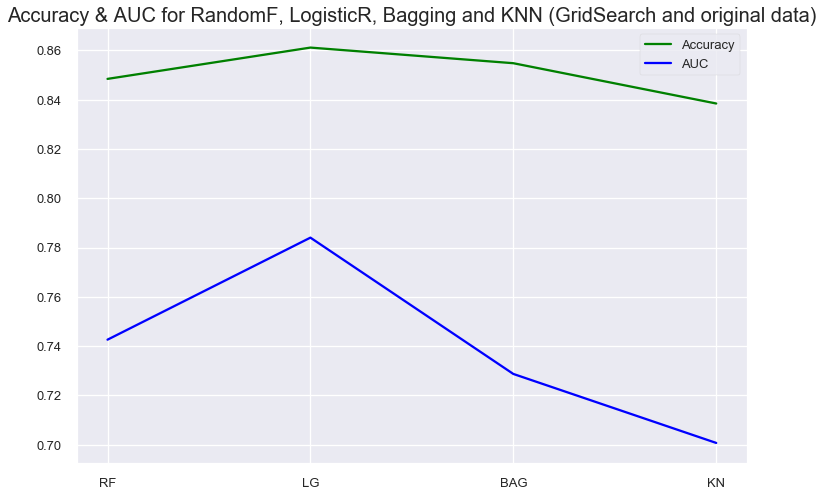

In [43]:
plt.figure(figsize=(12,8))

plt.plot(list(model_dict.values()), list(accuracies.values()), color="green")
plt.plot(list(model_dict.values()), list(aucs.values()), color="blue")
plt.legend(["Accuracy", "AUC"])
plt.title("Accuracy & AUC for RandomF, LogisticR, Bagging and KNN (GridSearch and original data)", fontsize=20)
plt.show()

In [44]:
pd.DataFrame(list(zip(model_dict.values(), accuracies.values(), aucs.values())), columns=["Model", "Accuracy", "AUC"]).set_index("Model")

Accuracy       AUC
Model                    
RF     0.848462  0.742643
LG     0.861164  0.784049
BAG    0.854825  0.728743
KN     0.838474  0.700749

In [45]:
smt_accuracies = {}
smt_aucs = {}
smt_models = []

for index, model in enumerate(mod):
    print(f"Working on model {model_dict[index]} with SMOTE data----------------------")
    model.fit(X_train_sm, y_train_sm)
    print(f"Best parameters: {model.best_params_}")
    print(f"Best score: {model.best_score_}")
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"Area under the curve: {auc}")
    print(f"Accuracy: {model.score(X_test, y_test)}")
    smt_models.append(model.best_estimator_)
    smt_aucs[index] = auc
    smt_accuracies[index] = model.best_score_

Working on model RF with SMOTE data----------------------
Best parameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 2}
Best score: 0.904170970881054
Area under the curve: 0.7481119791666667
Accuracy: 0.8586956521739131
Working on model LG with SMOTE data----------------------
Best parameters: {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best score: 0.7957272250916984
Area under the curve: 0.7688802083333334
Accuracy: 0.7771739130434783
Working on model BAG with SMOTE data----------------------
Best parameters: {'bag__n_estimators': 30}
Best score: 0.9145789355490679
Area under the curve: 0.7449869791666666
Accuracy: 0.8586956521739131
Working on model KN with SMOTE data----------------------
Best parameters: {'kn__n_neighbors': 5}
Best score: 0.8012111685006362
Area under the curve: 0.6794596354166667
Accuracy: 0.657608695652174


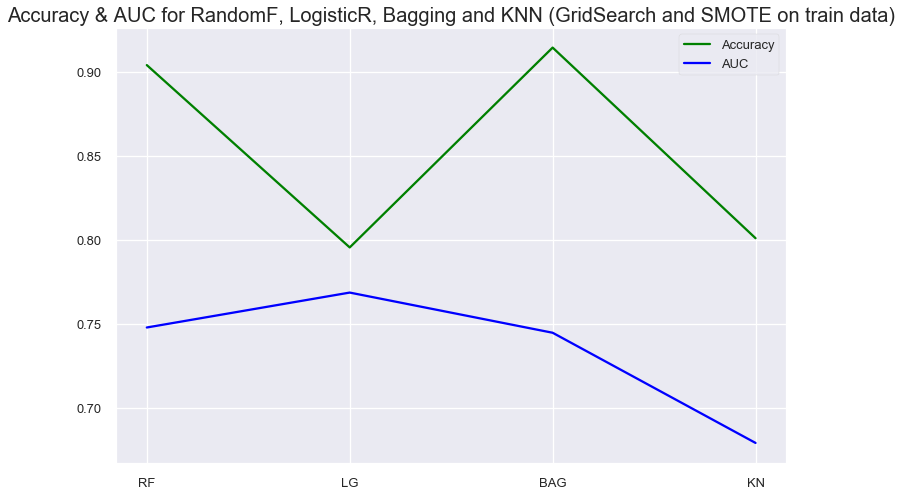

In [46]:
plt.figure(figsize=(12,8))
plt.plot(list(model_dict.values()), list(smt_accuracies.values()), color="green")
plt.plot(list(model_dict.values()), list(smt_aucs.values()), color="blue")
plt.legend(["Accuracy", "AUC"])
plt.title("Accuracy & AUC for RandomF, LogisticR, Bagging and KNN (GridSearch and SMOTE on train data)", fontsize=20)
plt.show()

In [47]:
pd.DataFrame(list(zip(model_dict.values(), smt_accuracies.values(), smt_aucs.values())), columns=["Model", "Accuracy", "AUC"]).set_index("Model")

Accuracy       AUC
Model                    
RF     0.904171  0.748112
LG     0.795727  0.768880
BAG    0.914579  0.744987
KN     0.801211  0.679460

In [48]:
## SUPPORT VECTOR MACHINE CLASS.

svm_pip = Pipeline([("svm", svm.SVC(random_state=43, probability=True))])

svm_par = [{
    'svm__C': [0.9, 1.0, 1.2, 1.3, 1.4, 1.5],
    'svm__kernel': ["rbf", "sigmoid"],
    'svm__coef0': [0.001, 0.01,0.0, 0.1]
    
}]

gs_svm = GridSearchCV(svm_pip, param_grid=svm_par, scoring="accuracy", cv=cv)
gs_svm_smt = GridSearchCV(svm_pip, param_grid=svm_par, scoring="accuracy", cv=cv)

gs_svm.fit(X_train, y_train)
print(f"Best score SVM with original data: {gs_svm.best_score_}")
print(f"Best estimator SVM  with original data: {gs_svm.best_estimator_}")
svm_m = gs_svm.best_estimator_
print(f"Accuracy SVM with original data: {gs_svm.score(X_test, y_test)}")
print(f"AUC SVM with original data: {roc_auc_score(y_test, gs_svm.predict_proba(X_test)[:,1])}")
gs_svm_smt.fit(X_train_sm, y_train_sm)
print(f"Best score SVM with SMOTE data: {gs_svm_smt.best_score_}")
print(f"Best estimator SVM  with SMOTE data: {gs_svm_smt.best_estimator_}")
print(f"Accuracy SVM with SMOTE data: {gs_svm_smt.score(X_test, y_test)}")
print(f"AUC SVM with SMOTE data: {roc_auc_score(y_test, gs_svm_smt.predict_proba(X_test)[:,1])}")


Best score SVM with original data: 0.859350061703003
Best estimator SVM  with original data: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.4, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='sigmoid', max_iter=-1,
                     probability=True, random_state=43, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy SVM with original data: 0.8831521739130435
AUC SVM with original data: 0.7818359375
Best score SVM with SMOTE data: 0.9255138857698929
Best estimator SVM  with SMOTE data: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.001, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_st

## 6.- FEATURE IMPORTANCE IN RANDOM FOREST

We are trying to understand a bit better the relative contribution of each feature in one of our models fitted on original data (Random Forest). This method of feature importance is included in Random Forest and it decreases the impurity as the tree continues with lower nodes/leafs.

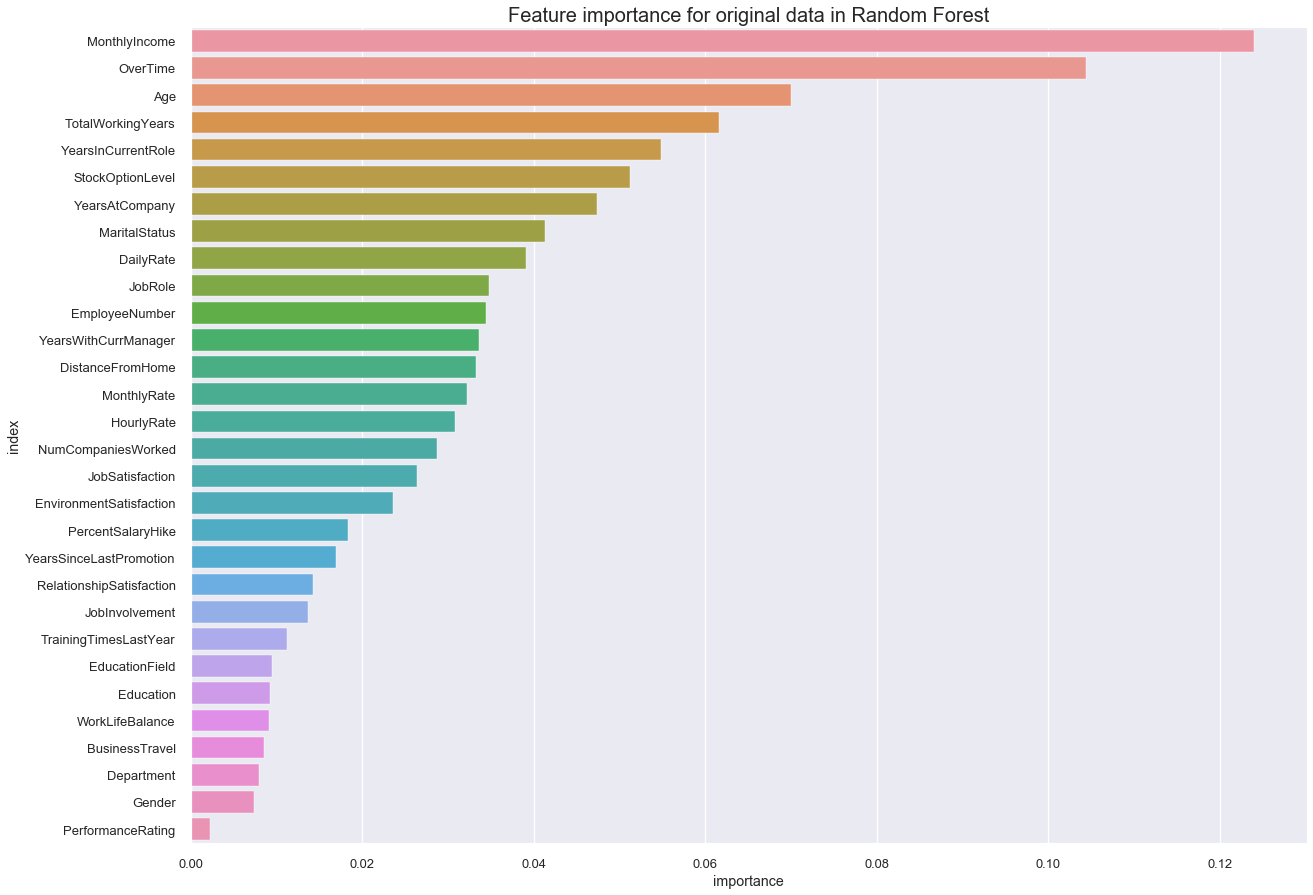

In [72]:

plt.figure(figsize=(20,15))

RF_m= RandomForestClassifier(max_depth= 10, min_samples_leaf= 8, min_samples_split= 2, random_state=43, oob_score=True, n_jobs=-1)
RF_m.fit(X_train, y_train)

RFimp = pd.DataFrame(RF_m.feature_importances_, X_train.columns, columns=["importance"]).reset_index()
RFimp = RFimp.sort_values(by="importance", ascending=False)
sns.barplot(x= "importance", y="index", data=RFimp)
plt.title("Feature importance for original data in Random Forest", fontsize=20)
plt.show()

## 7.- XGBOOST

After looking into the previous algos, it seems interesting to work with one of the most popular algo which is applicable for this classification problem. 
As explained in https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/, it efficiency comes, amongst other reasons, due to its ability to combine and get to a result from various models (ensemble learning). Here base learners (week learners separatelly) produces much better results most of the times when these are aggregated in this ensemble learning.

Boosting comes from building trees sequentially where errors should be reduced along the posterior trees.

Additionally, it is capable of preventing overfitting by regularization. Gamma parameter goes from 0, no regularization, to inf. where greater values means further pruning. In below implementation our gamma parameter has a range [0.1, 0.5, 0.9, 1, 1.5, 5]

Finally, one of its most important features it is the parallelization made in each tree by creating branches independently.

For XGBoost we follow the same structure by setting a few parameters which will be optimized by applying a Randomized Search with a Stratified 5 fold cross validation.

In [50]:

m_xgb = xgb.XGBClassifier(n_jobs = -1, objective= 'binary:logistic')


xgb_params = [{
        'n_estimators' : [100, 200, 500, 750, 1000],
        'max_depth': [3, 4, 5, 10, 12],
        'min_child_weight': [1, 2,  5, 7, 10],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'gamma': [0.1, 0.5, 0.9, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
}]

cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=43)

rs_xgb_m = RandomizedSearchCV(m_xgb, param_distributions=xgb_params, cv=cv, scoring="accuracy", random_state=43, n_iter=5, verbose=3)
rs_xgb_m.fit(X_train, y_train,  eval_set=[(X_test,y_test)])
y_pred = rs_xgb_m.predict(X_test)
y_prob = rs_xgb_m.predict_proba(X_test)[:,1]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8 
[0]	validation_0-error:0.125
[1]	validation_0-error:0.138587
[2]	validation_0-error:0.141304
[3]	validation_0-error:0.127717
[4]	validation_0-error:0.127717
[5]	validation_0-error:0.127717
[6]	validation_0-error:0.127717
[7]	validation_0-error:0.127717
[8]	validation_0-error:0.130435
[9]	validation_0-error:0.133152
[10]	validation_0-error:0.130435
[11]	validation_0-error:0.133152
[12]	validation_0-error:0.13587
[13]	validation_0-error:0.130435
[14]	validation_0-error:0.127717
[15]	validation_0-error:0.133152
[16]	validation_0-error:0.130435
[17]	validation_0-error:0.130435
[18]	validation_0-error:0.130435
[19]	validation_0-error:0.130435
[20]	validation_0-error:0.133152
[21]	validation_0-error:0.133152
[22]	validation_0-error:0.130435
[23]	validation_0-error:0.133152
[24]	validation_0-error:0.133152
[25]	validation_0-error:0.133152
[26]	validation_0-error:0.13315

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8 
[0]	validation_0-error:0.173913
[1]	validation_0-error:0.152174
[2]	validation_0-error:0.125
[3]	validation_0-error:0.141304
[4]	validation_0-error:0.133152
[5]	validation_0-error:0.133152
[6]	validation_0-error:0.133152
[7]	validation_0-error:0.133152
[8]	validation_0-error:0.133152
[9]	validation_0-error:0.130435
[10]	validation_0-error:0.130435
[11]	validation_0-error:0.130435
[12]	validation_0-error:0.130435
[13]	validation_0-error:0.130435
[14]	validation_0-error:0.133152
[15]	validation_0-error:0.133152
[16]	validation_0-error:0.133152
[17]	validation_0-error:0.133152
[18]	validation_0-error:0.133152
[19]	validation_0-error:0.130435
[20]	validation_0-error:0.133152
[21]	validation_0-error:0.133152
[22]	validation_0-error:0.13587
[23]	validation_0-error:0.138587
[24]	validation_0-error:0.133152
[25]	validation_0-error:0.133152
[26]	validation_0-error:0.13587

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8 
[0]	validation_0-error:0.141304
[1]	validation_0-error:0.168478
[2]	validation_0-error:0.163043
[3]	validation_0-error:0.144022
[4]	validation_0-error:0.144022
[5]	validation_0-error:0.146739
[6]	validation_0-error:0.144022
[7]	validation_0-error:0.141304
[8]	validation_0-error:0.146739
[9]	validation_0-error:0.133152
[10]	validation_0-error:0.138587
[11]	validation_0-error:0.138587
[12]	validation_0-error:0.138587
[13]	validation_0-error:0.13587
[14]	validation_0-error:0.138587
[15]	validation_0-error:0.133152
[16]	validation_0-error:0.133152
[17]	validation_0-error:0.138587
[18]	validation_0-error:0.133152
[19]	validation_0-error:0.133152
[20]	validation_0-error:0.130435
[21]	validation_0-error:0.13587
[22]	validation_0-error:0.13587
[23]	validation_0-error:0.13587
[24]	validation_0-error:0.133152
[25]	validation_0-error:0.138587
[26]	validation_0-error:0.13587

[39]	validation_0-error:0.130435
[40]	validation_0-error:0.130435
[41]	validation_0-error:0.133152
[42]	validation_0-error:0.130435
[43]	validation_0-error:0.130435
[44]	validation_0-error:0.130435
[45]	validation_0-error:0.130435
[46]	validation_0-error:0.130435
[47]	validation_0-error:0.130435
[48]	validation_0-error:0.130435
[49]	validation_0-error:0.130435
[50]	validation_0-error:0.130435
[51]	validation_0-error:0.130435
[52]	validation_0-error:0.130435
[53]	validation_0-error:0.130435
[54]	validation_0-error:0.130435
[55]	validation_0-error:0.130435
[56]	validation_0-error:0.130435
[57]	validation_0-error:0.130435
[58]	validation_0-error:0.130435
[59]	validation_0-error:0.130435
[60]	validation_0-error:0.130435
[61]	validation_0-error:0.130435
[62]	validation_0-error:0.130435
[63]	validation_0-error:0.130435
[64]	validation_0-error:0.130435
[65]	validation_0-error:0.130435
[66]	validation_0-error:0.130435
[67]	validation_0-error:0.130435
[68]	validation_0-error:0.130435
[69]	valid

[79]	validation_0-error:0.125
[80]	validation_0-error:0.125
[81]	validation_0-error:0.122283
[82]	validation_0-error:0.122283
[83]	validation_0-error:0.122283
[84]	validation_0-error:0.122283
[85]	validation_0-error:0.116848
[86]	validation_0-error:0.119565
[87]	validation_0-error:0.122283
[88]	validation_0-error:0.122283
[89]	validation_0-error:0.122283
[90]	validation_0-error:0.119565
[91]	validation_0-error:0.122283
[92]	validation_0-error:0.122283
[93]	validation_0-error:0.119565
[94]	validation_0-error:0.122283
[95]	validation_0-error:0.122283
[96]	validation_0-error:0.122283
[97]	validation_0-error:0.122283
[98]	validation_0-error:0.122283
[99]	validation_0-error:0.119565
[100]	validation_0-error:0.119565
[101]	validation_0-error:0.119565
[102]	validation_0-error:0.122283
[103]	validation_0-error:0.119565
[104]	validation_0-error:0.119565
[105]	validation_0-error:0.122283
[106]	validation_0-error:0.122283
[107]	validation_0-error:0.119565
[108]	validation_0-error:0.122283
[109]	v

[119]	validation_0-error:0.122283
[120]	validation_0-error:0.122283
[121]	validation_0-error:0.122283
[122]	validation_0-error:0.122283
[123]	validation_0-error:0.122283
[124]	validation_0-error:0.122283
[125]	validation_0-error:0.122283
[126]	validation_0-error:0.122283
[127]	validation_0-error:0.122283
[128]	validation_0-error:0.122283
[129]	validation_0-error:0.122283
[130]	validation_0-error:0.122283
[131]	validation_0-error:0.122283
[132]	validation_0-error:0.122283
[133]	validation_0-error:0.125
[134]	validation_0-error:0.122283
[135]	validation_0-error:0.122283
[136]	validation_0-error:0.122283
[137]	validation_0-error:0.122283
[138]	validation_0-error:0.122283
[139]	validation_0-error:0.122283
[140]	validation_0-error:0.122283
[141]	validation_0-error:0.122283
[142]	validation_0-error:0.122283
[143]	validation_0-error:0.122283
[144]	validation_0-error:0.122283
[145]	validation_0-error:0.122283
[146]	validation_0-error:0.122283
[147]	validation_0-error:0.122283
[148]	validation_

[363]	validation_0-error:0.125
[364]	validation_0-error:0.125
[365]	validation_0-error:0.122283
[366]	validation_0-error:0.119565
[367]	validation_0-error:0.119565
[368]	validation_0-error:0.119565
[369]	validation_0-error:0.119565
[370]	validation_0-error:0.119565
[371]	validation_0-error:0.119565
[372]	validation_0-error:0.119565
[373]	validation_0-error:0.119565
[374]	validation_0-error:0.119565
[375]	validation_0-error:0.119565
[376]	validation_0-error:0.119565
[377]	validation_0-error:0.122283
[378]	validation_0-error:0.119565
[379]	validation_0-error:0.122283
[380]	validation_0-error:0.122283
[381]	validation_0-error:0.122283
[382]	validation_0-error:0.122283
[383]	validation_0-error:0.122283
[384]	validation_0-error:0.122283
[385]	validation_0-error:0.125
[386]	validation_0-error:0.125
[387]	validation_0-error:0.125
[388]	validation_0-error:0.125
[389]	validation_0-error:0.125
[390]	validation_0-error:0.125
[391]	validation_0-error:0.125
[392]	validation_0-error:0.125
[393]	vali

[107]	validation_0-error:0.127717
[108]	validation_0-error:0.125
[109]	validation_0-error:0.125
[110]	validation_0-error:0.122283
[111]	validation_0-error:0.125
[112]	validation_0-error:0.125
[113]	validation_0-error:0.125
[114]	validation_0-error:0.125
[115]	validation_0-error:0.127717
[116]	validation_0-error:0.125
[117]	validation_0-error:0.125
[118]	validation_0-error:0.122283
[119]	validation_0-error:0.122283
[120]	validation_0-error:0.119565
[121]	validation_0-error:0.119565
[122]	validation_0-error:0.119565
[123]	validation_0-error:0.119565
[124]	validation_0-error:0.116848
[125]	validation_0-error:0.119565
[126]	validation_0-error:0.122283
[127]	validation_0-error:0.116848
[128]	validation_0-error:0.125
[129]	validation_0-error:0.122283
[130]	validation_0-error:0.125
[131]	validation_0-error:0.122283
[132]	validation_0-error:0.125
[133]	validation_0-error:0.125
[134]	validation_0-error:0.125
[135]	validation_0-error:0.125
[136]	validation_0-error:0.125
[137]	validation_0-error:

[353]	validation_0-error:0.13587
[354]	validation_0-error:0.13587
[355]	validation_0-error:0.13587
[356]	validation_0-error:0.13587
[357]	validation_0-error:0.13587
[358]	validation_0-error:0.13587
[359]	validation_0-error:0.13587
[360]	validation_0-error:0.13587
[361]	validation_0-error:0.13587
[362]	validation_0-error:0.13587
[363]	validation_0-error:0.13587
[364]	validation_0-error:0.138587
[365]	validation_0-error:0.13587
[366]	validation_0-error:0.138587
[367]	validation_0-error:0.13587
[368]	validation_0-error:0.13587
[369]	validation_0-error:0.13587
[370]	validation_0-error:0.13587
[371]	validation_0-error:0.13587
[372]	validation_0-error:0.13587
[373]	validation_0-error:0.138587
[374]	validation_0-error:0.13587
[375]	validation_0-error:0.141304
[376]	validation_0-error:0.138587
[377]	validation_0-error:0.141304
[378]	validation_0-error:0.141304
[379]	validation_0-error:0.141304
[380]	validation_0-error:0.138587
[381]	validation_0-error:0.138587
[382]	validation_0-error:0.138587

[91]	validation_0-error:0.13587
[92]	validation_0-error:0.13587
[93]	validation_0-error:0.13587
[94]	validation_0-error:0.13587
[95]	validation_0-error:0.13587
[96]	validation_0-error:0.13587
[97]	validation_0-error:0.133152
[98]	validation_0-error:0.13587
[99]	validation_0-error:0.138587
[100]	validation_0-error:0.13587
[101]	validation_0-error:0.138587
[102]	validation_0-error:0.133152
[103]	validation_0-error:0.13587
[104]	validation_0-error:0.133152
[105]	validation_0-error:0.130435
[106]	validation_0-error:0.130435
[107]	validation_0-error:0.130435
[108]	validation_0-error:0.130435
[109]	validation_0-error:0.130435
[110]	validation_0-error:0.127717
[111]	validation_0-error:0.130435
[112]	validation_0-error:0.130435
[113]	validation_0-error:0.127717
[114]	validation_0-error:0.127717
[115]	validation_0-error:0.127717
[116]	validation_0-error:0.127717
[117]	validation_0-error:0.127717
[118]	validation_0-error:0.127717
[119]	validation_0-error:0.127717
[120]	validation_0-error:0.12771

[338]	validation_0-error:0.122283
[339]	validation_0-error:0.122283
[340]	validation_0-error:0.122283
[341]	validation_0-error:0.122283
[342]	validation_0-error:0.122283
[343]	validation_0-error:0.125
[344]	validation_0-error:0.125
[345]	validation_0-error:0.125
[346]	validation_0-error:0.125
[347]	validation_0-error:0.125
[348]	validation_0-error:0.122283
[349]	validation_0-error:0.122283
[350]	validation_0-error:0.122283
[351]	validation_0-error:0.122283
[352]	validation_0-error:0.122283
[353]	validation_0-error:0.122283
[354]	validation_0-error:0.122283
[355]	validation_0-error:0.122283
[356]	validation_0-error:0.122283
[357]	validation_0-error:0.122283
[358]	validation_0-error:0.122283
[359]	validation_0-error:0.125
[360]	validation_0-error:0.127717
[361]	validation_0-error:0.127717
[362]	validation_0-error:0.127717
[363]	validation_0-error:0.127717
[364]	validation_0-error:0.127717
[365]	validation_0-error:0.127717
[366]	validation_0-error:0.127717
[367]	validation_0-error:0.12771

[77]	validation_0-error:0.133152
[78]	validation_0-error:0.138587
[79]	validation_0-error:0.13587
[80]	validation_0-error:0.133152
[81]	validation_0-error:0.133152
[82]	validation_0-error:0.133152
[83]	validation_0-error:0.130435
[84]	validation_0-error:0.130435
[85]	validation_0-error:0.130435
[86]	validation_0-error:0.133152
[87]	validation_0-error:0.130435
[88]	validation_0-error:0.127717
[89]	validation_0-error:0.127717
[90]	validation_0-error:0.127717
[91]	validation_0-error:0.127717
[92]	validation_0-error:0.125
[93]	validation_0-error:0.122283
[94]	validation_0-error:0.122283
[95]	validation_0-error:0.122283
[96]	validation_0-error:0.122283
[97]	validation_0-error:0.122283
[98]	validation_0-error:0.122283
[99]	validation_0-error:0.122283
[100]	validation_0-error:0.122283
[101]	validation_0-error:0.125
[102]	validation_0-error:0.125
[103]	validation_0-error:0.127717
[104]	validation_0-error:0.125
[105]	validation_0-error:0.125
[106]	validation_0-error:0.125
[107]	validation_0-err

[325]	validation_0-error:0.125
[326]	validation_0-error:0.122283
[327]	validation_0-error:0.125
[328]	validation_0-error:0.122283
[329]	validation_0-error:0.125
[330]	validation_0-error:0.127717
[331]	validation_0-error:0.130435
[332]	validation_0-error:0.127717
[333]	validation_0-error:0.127717
[334]	validation_0-error:0.130435
[335]	validation_0-error:0.130435
[336]	validation_0-error:0.130435
[337]	validation_0-error:0.127717
[338]	validation_0-error:0.127717
[339]	validation_0-error:0.127717
[340]	validation_0-error:0.127717
[341]	validation_0-error:0.127717
[342]	validation_0-error:0.127717
[343]	validation_0-error:0.127717
[344]	validation_0-error:0.127717
[345]	validation_0-error:0.127717
[346]	validation_0-error:0.127717
[347]	validation_0-error:0.127717
[348]	validation_0-error:0.127717
[349]	validation_0-error:0.127717
[350]	validation_0-error:0.127717
[351]	validation_0-error:0.127717
[352]	validation_0-error:0.127717
[353]	validation_0-error:0.127717
[354]	validation_0-erro

[63]	validation_0-error:0.122283
[64]	validation_0-error:0.122283
[65]	validation_0-error:0.122283
[66]	validation_0-error:0.125
[67]	validation_0-error:0.122283
[68]	validation_0-error:0.122283
[69]	validation_0-error:0.122283
[70]	validation_0-error:0.122283
[71]	validation_0-error:0.119565
[72]	validation_0-error:0.122283
[73]	validation_0-error:0.122283
[74]	validation_0-error:0.122283
[75]	validation_0-error:0.122283
[76]	validation_0-error:0.125
[77]	validation_0-error:0.125
[78]	validation_0-error:0.125
[79]	validation_0-error:0.127717
[80]	validation_0-error:0.127717
[81]	validation_0-error:0.125
[82]	validation_0-error:0.125
[83]	validation_0-error:0.125
[84]	validation_0-error:0.125
[85]	validation_0-error:0.125
[86]	validation_0-error:0.125
[87]	validation_0-error:0.125
[88]	validation_0-error:0.125
[89]	validation_0-error:0.125
[90]	validation_0-error:0.125
[91]	validation_0-error:0.125
[92]	validation_0-error:0.125
[93]	validation_0-error:0.125
[94]	validation_0-error:0.12

[313]	validation_0-error:0.125
[314]	validation_0-error:0.125
[315]	validation_0-error:0.125
[316]	validation_0-error:0.125
[317]	validation_0-error:0.125
[318]	validation_0-error:0.125
[319]	validation_0-error:0.125
[320]	validation_0-error:0.125
[321]	validation_0-error:0.125
[322]	validation_0-error:0.125
[323]	validation_0-error:0.125
[324]	validation_0-error:0.125
[325]	validation_0-error:0.125
[326]	validation_0-error:0.122283
[327]	validation_0-error:0.125
[328]	validation_0-error:0.125
[329]	validation_0-error:0.119565
[330]	validation_0-error:0.122283
[331]	validation_0-error:0.116848
[332]	validation_0-error:0.119565
[333]	validation_0-error:0.116848
[334]	validation_0-error:0.116848
[335]	validation_0-error:0.119565
[336]	validation_0-error:0.116848
[337]	validation_0-error:0.119565
[338]	validation_0-error:0.119565
[339]	validation_0-error:0.122283
[340]	validation_0-error:0.122283
[341]	validation_0-error:0.119565
[342]	validation_0-error:0.125
[343]	validation_0-error:0.1

[53]	validation_0-error:0.125
[54]	validation_0-error:0.122283
[55]	validation_0-error:0.127717
[56]	validation_0-error:0.125
[57]	validation_0-error:0.125
[58]	validation_0-error:0.127717
[59]	validation_0-error:0.127717
[60]	validation_0-error:0.130435
[61]	validation_0-error:0.130435
[62]	validation_0-error:0.127717
[63]	validation_0-error:0.125
[64]	validation_0-error:0.125
[65]	validation_0-error:0.127717
[66]	validation_0-error:0.125
[67]	validation_0-error:0.122283
[68]	validation_0-error:0.133152
[69]	validation_0-error:0.130435
[70]	validation_0-error:0.130435
[71]	validation_0-error:0.130435
[72]	validation_0-error:0.130435
[73]	validation_0-error:0.130435
[74]	validation_0-error:0.127717
[75]	validation_0-error:0.127717
[76]	validation_0-error:0.127717
[77]	validation_0-error:0.127717
[78]	validation_0-error:0.125
[79]	validation_0-error:0.125
[80]	validation_0-error:0.125
[81]	validation_0-error:0.125
[82]	validation_0-error:0.125
[83]	validation_0-error:0.122283
[84]	valid

[301]	validation_0-error:0.13587
[302]	validation_0-error:0.13587
[303]	validation_0-error:0.138587
[304]	validation_0-error:0.138587
[305]	validation_0-error:0.138587
[306]	validation_0-error:0.138587
[307]	validation_0-error:0.138587
[308]	validation_0-error:0.138587
[309]	validation_0-error:0.138587
[310]	validation_0-error:0.138587
[311]	validation_0-error:0.138587
[312]	validation_0-error:0.138587
[313]	validation_0-error:0.141304
[314]	validation_0-error:0.141304
[315]	validation_0-error:0.144022
[316]	validation_0-error:0.144022
[317]	validation_0-error:0.141304
[318]	validation_0-error:0.141304
[319]	validation_0-error:0.144022
[320]	validation_0-error:0.141304
[321]	validation_0-error:0.144022
[322]	validation_0-error:0.144022
[323]	validation_0-error:0.146739
[324]	validation_0-error:0.146739
[325]	validation_0-error:0.146739
[326]	validation_0-error:0.146739
[327]	validation_0-error:0.146739
[328]	validation_0-error:0.146739
[329]	validation_0-error:0.146739
[330]	validation

[543]	validation_0-error:0.13587
[544]	validation_0-error:0.138587
[545]	validation_0-error:0.138587
[546]	validation_0-error:0.138587
[547]	validation_0-error:0.138587
[548]	validation_0-error:0.13587
[549]	validation_0-error:0.13587
[550]	validation_0-error:0.13587
[551]	validation_0-error:0.13587
[552]	validation_0-error:0.13587
[553]	validation_0-error:0.13587
[554]	validation_0-error:0.13587
[555]	validation_0-error:0.138587
[556]	validation_0-error:0.138587
[557]	validation_0-error:0.13587
[558]	validation_0-error:0.141304
[559]	validation_0-error:0.141304
[560]	validation_0-error:0.141304
[561]	validation_0-error:0.141304
[562]	validation_0-error:0.141304
[563]	validation_0-error:0.144022
[564]	validation_0-error:0.149457
[565]	validation_0-error:0.149457
[566]	validation_0-error:0.149457
[567]	validation_0-error:0.149457
[568]	validation_0-error:0.152174
[569]	validation_0-error:0.152174
[570]	validation_0-error:0.149457
[571]	validation_0-error:0.149457
[572]	validation_0-erro

[785]	validation_0-error:0.13587
[786]	validation_0-error:0.13587
[787]	validation_0-error:0.13587
[788]	validation_0-error:0.13587
[789]	validation_0-error:0.13587
[790]	validation_0-error:0.13587
[791]	validation_0-error:0.13587
[792]	validation_0-error:0.13587
[793]	validation_0-error:0.13587
[794]	validation_0-error:0.13587
[795]	validation_0-error:0.13587
[796]	validation_0-error:0.13587
[797]	validation_0-error:0.13587
[798]	validation_0-error:0.13587
[799]	validation_0-error:0.13587
[800]	validation_0-error:0.13587
[801]	validation_0-error:0.13587
[802]	validation_0-error:0.13587
[803]	validation_0-error:0.13587
[804]	validation_0-error:0.13587
[805]	validation_0-error:0.13587
[806]	validation_0-error:0.138587
[807]	validation_0-error:0.13587
[808]	validation_0-error:0.141304
[809]	validation_0-error:0.141304
[810]	validation_0-error:0.141304
[811]	validation_0-error:0.141304
[812]	validation_0-error:0.144022
[813]	validation_0-error:0.144022
[814]	validation_0-error:0.144022
[8

[20]	validation_0-error:0.125
[21]	validation_0-error:0.13587
[22]	validation_0-error:0.130435
[23]	validation_0-error:0.125
[24]	validation_0-error:0.133152
[25]	validation_0-error:0.122283
[26]	validation_0-error:0.125
[27]	validation_0-error:0.122283
[28]	validation_0-error:0.125
[29]	validation_0-error:0.133152
[30]	validation_0-error:0.125
[31]	validation_0-error:0.11413
[32]	validation_0-error:0.119565
[33]	validation_0-error:0.119565
[34]	validation_0-error:0.119565
[35]	validation_0-error:0.116848
[36]	validation_0-error:0.119565
[37]	validation_0-error:0.125
[38]	validation_0-error:0.116848
[39]	validation_0-error:0.127717
[40]	validation_0-error:0.127717
[41]	validation_0-error:0.125
[42]	validation_0-error:0.125
[43]	validation_0-error:0.119565
[44]	validation_0-error:0.122283
[45]	validation_0-error:0.122283
[46]	validation_0-error:0.122283
[47]	validation_0-error:0.119565
[48]	validation_0-error:0.122283
[49]	validation_0-error:0.130435
[50]	validation_0-error:0.125
[51]	v

[269]	validation_0-error:0.138587
[270]	validation_0-error:0.138587
[271]	validation_0-error:0.138587
[272]	validation_0-error:0.138587
[273]	validation_0-error:0.138587
[274]	validation_0-error:0.138587
[275]	validation_0-error:0.138587
[276]	validation_0-error:0.13587
[277]	validation_0-error:0.138587
[278]	validation_0-error:0.138587
[279]	validation_0-error:0.138587
[280]	validation_0-error:0.138587
[281]	validation_0-error:0.138587
[282]	validation_0-error:0.138587
[283]	validation_0-error:0.138587
[284]	validation_0-error:0.138587
[285]	validation_0-error:0.138587
[286]	validation_0-error:0.138587
[287]	validation_0-error:0.138587
[288]	validation_0-error:0.138587
[289]	validation_0-error:0.138587
[290]	validation_0-error:0.138587
[291]	validation_0-error:0.138587
[292]	validation_0-error:0.138587
[293]	validation_0-error:0.138587
[294]	validation_0-error:0.138587
[295]	validation_0-error:0.138587
[296]	validation_0-error:0.138587
[297]	validation_0-error:0.138587
[298]	validatio

[513]	validation_0-error:0.13587
[514]	validation_0-error:0.13587
[515]	validation_0-error:0.13587
[516]	validation_0-error:0.13587
[517]	validation_0-error:0.13587
[518]	validation_0-error:0.13587
[519]	validation_0-error:0.13587
[520]	validation_0-error:0.13587
[521]	validation_0-error:0.13587
[522]	validation_0-error:0.138587
[523]	validation_0-error:0.138587
[524]	validation_0-error:0.138587
[525]	validation_0-error:0.13587
[526]	validation_0-error:0.13587
[527]	validation_0-error:0.13587
[528]	validation_0-error:0.13587
[529]	validation_0-error:0.13587
[530]	validation_0-error:0.13587
[531]	validation_0-error:0.138587
[532]	validation_0-error:0.138587
[533]	validation_0-error:0.138587
[534]	validation_0-error:0.138587
[535]	validation_0-error:0.138587
[536]	validation_0-error:0.138587
[537]	validation_0-error:0.138587
[538]	validation_0-error:0.138587
[539]	validation_0-error:0.138587
[540]	validation_0-error:0.138587
[541]	validation_0-error:0.138587
[542]	validation_0-error:0.13

[757]	validation_0-error:0.138587
[758]	validation_0-error:0.138587
[759]	validation_0-error:0.138587
[760]	validation_0-error:0.138587
[761]	validation_0-error:0.138587
[762]	validation_0-error:0.138587
[763]	validation_0-error:0.138587
[764]	validation_0-error:0.138587
[765]	validation_0-error:0.138587
[766]	validation_0-error:0.138587
[767]	validation_0-error:0.13587
[768]	validation_0-error:0.13587
[769]	validation_0-error:0.13587
[770]	validation_0-error:0.13587
[771]	validation_0-error:0.138587
[772]	validation_0-error:0.13587
[773]	validation_0-error:0.13587
[774]	validation_0-error:0.13587
[775]	validation_0-error:0.13587
[776]	validation_0-error:0.138587
[777]	validation_0-error:0.138587
[778]	validation_0-error:0.138587
[779]	validation_0-error:0.138587
[780]	validation_0-error:0.138587
[781]	validation_0-error:0.138587
[782]	validation_0-error:0.138587
[783]	validation_0-error:0.138587
[784]	validation_0-error:0.138587
[785]	validation_0-error:0.138587
[786]	validation_0-err

[CV]  subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=3, learning_rate=0.25, gamma=1, colsample_bytree=0.8, score=0.860, total=   3.6s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=3, learning_rate=0.25, gamma=1, colsample_bytree=0.8 
[0]	validation_0-error:0.144022
[1]	validation_0-error:0.130435
[2]	validation_0-error:0.133152
[3]	validation_0-error:0.144022
[4]	validation_0-error:0.138587
[5]	validation_0-error:0.138587
[6]	validation_0-error:0.141304
[7]	validation_0-error:0.133152
[8]	validation_0-error:0.130435
[9]	validation_0-error:0.130435
[10]	validation_0-error:0.141304
[11]	validation_0-error:0.138587
[12]	validation_0-error:0.138587
[13]	validation_0-error:0.146739
[14]	validation_0-error:0.141304
[15]	validation_0-error:0.138587
[16]	validation_0-error:0.13587
[17]	validation_0-error:0.138587
[18]	validation_0-error:0.13587
[19]	validation_0-error:0.138587
[20]	validation_0-error:0.13587
[21]	validation_0-error:0.138587
[22]	valida

[240]	validation_0-error:0.138587
[241]	validation_0-error:0.13587
[242]	validation_0-error:0.141304
[243]	validation_0-error:0.144022
[244]	validation_0-error:0.141304
[245]	validation_0-error:0.13587
[246]	validation_0-error:0.146739
[247]	validation_0-error:0.146739
[248]	validation_0-error:0.144022
[249]	validation_0-error:0.138587
[250]	validation_0-error:0.144022
[251]	validation_0-error:0.144022
[252]	validation_0-error:0.144022
[253]	validation_0-error:0.144022
[254]	validation_0-error:0.144022
[255]	validation_0-error:0.144022
[256]	validation_0-error:0.144022
[257]	validation_0-error:0.141304
[258]	validation_0-error:0.141304
[259]	validation_0-error:0.141304
[260]	validation_0-error:0.141304
[261]	validation_0-error:0.144022
[262]	validation_0-error:0.144022
[263]	validation_0-error:0.144022
[264]	validation_0-error:0.144022
[265]	validation_0-error:0.144022
[266]	validation_0-error:0.144022
[267]	validation_0-error:0.144022
[268]	validation_0-error:0.144022
[269]	validation

[483]	validation_0-error:0.141304
[484]	validation_0-error:0.141304
[485]	validation_0-error:0.141304
[486]	validation_0-error:0.141304
[487]	validation_0-error:0.141304
[488]	validation_0-error:0.141304
[489]	validation_0-error:0.141304
[490]	validation_0-error:0.138587
[491]	validation_0-error:0.138587
[492]	validation_0-error:0.138587
[493]	validation_0-error:0.13587
[494]	validation_0-error:0.138587
[495]	validation_0-error:0.13587
[496]	validation_0-error:0.138587
[497]	validation_0-error:0.138587
[498]	validation_0-error:0.138587
[499]	validation_0-error:0.141304
[500]	validation_0-error:0.141304
[501]	validation_0-error:0.141304
[502]	validation_0-error:0.138587
[503]	validation_0-error:0.138587
[504]	validation_0-error:0.138587
[505]	validation_0-error:0.138587
[506]	validation_0-error:0.138587
[507]	validation_0-error:0.138587
[508]	validation_0-error:0.138587
[509]	validation_0-error:0.141304
[510]	validation_0-error:0.138587
[511]	validation_0-error:0.13587
[512]	validation_

[725]	validation_0-error:0.144022
[726]	validation_0-error:0.141304
[727]	validation_0-error:0.141304
[728]	validation_0-error:0.144022
[729]	validation_0-error:0.141304
[730]	validation_0-error:0.144022
[731]	validation_0-error:0.144022
[732]	validation_0-error:0.144022
[733]	validation_0-error:0.144022
[734]	validation_0-error:0.144022
[735]	validation_0-error:0.144022
[736]	validation_0-error:0.144022
[737]	validation_0-error:0.144022
[738]	validation_0-error:0.144022
[739]	validation_0-error:0.144022
[740]	validation_0-error:0.144022
[741]	validation_0-error:0.144022
[742]	validation_0-error:0.144022
[743]	validation_0-error:0.144022
[744]	validation_0-error:0.144022
[745]	validation_0-error:0.141304
[746]	validation_0-error:0.144022
[747]	validation_0-error:0.138587
[748]	validation_0-error:0.138587
[749]	validation_0-error:0.138587
[750]	validation_0-error:0.138587
[751]	validation_0-error:0.138587
[752]	validation_0-error:0.138587
[753]	validation_0-error:0.138587
[754]	validati

[966]	validation_0-error:0.146739
[967]	validation_0-error:0.146739
[968]	validation_0-error:0.146739
[969]	validation_0-error:0.144022
[970]	validation_0-error:0.144022
[971]	validation_0-error:0.144022
[972]	validation_0-error:0.144022
[973]	validation_0-error:0.144022
[974]	validation_0-error:0.144022
[975]	validation_0-error:0.144022
[976]	validation_0-error:0.144022
[977]	validation_0-error:0.144022
[978]	validation_0-error:0.144022
[979]	validation_0-error:0.144022
[980]	validation_0-error:0.144022
[981]	validation_0-error:0.144022
[982]	validation_0-error:0.144022
[983]	validation_0-error:0.144022
[984]	validation_0-error:0.144022
[985]	validation_0-error:0.144022
[986]	validation_0-error:0.144022
[987]	validation_0-error:0.144022
[988]	validation_0-error:0.146739
[989]	validation_0-error:0.146739
[990]	validation_0-error:0.146739
[991]	validation_0-error:0.146739
[992]	validation_0-error:0.146739
[993]	validation_0-error:0.146739
[994]	validation_0-error:0.144022
[995]	validati

[204]	validation_0-error:0.152174
[205]	validation_0-error:0.152174
[206]	validation_0-error:0.154891
[207]	validation_0-error:0.157609
[208]	validation_0-error:0.160326
[209]	validation_0-error:0.160326
[210]	validation_0-error:0.163043
[211]	validation_0-error:0.157609
[212]	validation_0-error:0.157609
[213]	validation_0-error:0.157609
[214]	validation_0-error:0.157609
[215]	validation_0-error:0.160326
[216]	validation_0-error:0.160326
[217]	validation_0-error:0.160326
[218]	validation_0-error:0.160326
[219]	validation_0-error:0.157609
[220]	validation_0-error:0.154891
[221]	validation_0-error:0.157609
[222]	validation_0-error:0.157609
[223]	validation_0-error:0.157609
[224]	validation_0-error:0.157609
[225]	validation_0-error:0.157609
[226]	validation_0-error:0.157609
[227]	validation_0-error:0.157609
[228]	validation_0-error:0.157609
[229]	validation_0-error:0.160326
[230]	validation_0-error:0.160326
[231]	validation_0-error:0.160326
[232]	validation_0-error:0.160326
[233]	validati

[445]	validation_0-error:0.163043
[446]	validation_0-error:0.163043
[447]	validation_0-error:0.163043
[448]	validation_0-error:0.163043
[449]	validation_0-error:0.163043
[450]	validation_0-error:0.165761
[451]	validation_0-error:0.165761
[452]	validation_0-error:0.165761
[453]	validation_0-error:0.165761
[454]	validation_0-error:0.165761
[455]	validation_0-error:0.165761
[456]	validation_0-error:0.163043
[457]	validation_0-error:0.163043
[458]	validation_0-error:0.163043
[459]	validation_0-error:0.163043
[460]	validation_0-error:0.163043
[461]	validation_0-error:0.163043
[462]	validation_0-error:0.163043
[463]	validation_0-error:0.163043
[464]	validation_0-error:0.163043
[465]	validation_0-error:0.163043
[466]	validation_0-error:0.163043
[467]	validation_0-error:0.163043
[468]	validation_0-error:0.163043
[469]	validation_0-error:0.165761
[470]	validation_0-error:0.165761
[471]	validation_0-error:0.165761
[472]	validation_0-error:0.165761
[473]	validation_0-error:0.163043
[474]	validati

[686]	validation_0-error:0.171196
[687]	validation_0-error:0.171196
[688]	validation_0-error:0.171196
[689]	validation_0-error:0.171196
[690]	validation_0-error:0.171196
[691]	validation_0-error:0.171196
[692]	validation_0-error:0.171196
[693]	validation_0-error:0.171196
[694]	validation_0-error:0.171196
[695]	validation_0-error:0.171196
[696]	validation_0-error:0.171196
[697]	validation_0-error:0.171196
[698]	validation_0-error:0.171196
[699]	validation_0-error:0.171196
[700]	validation_0-error:0.171196
[701]	validation_0-error:0.171196
[702]	validation_0-error:0.171196
[703]	validation_0-error:0.171196
[704]	validation_0-error:0.171196
[705]	validation_0-error:0.171196
[706]	validation_0-error:0.171196
[707]	validation_0-error:0.171196
[708]	validation_0-error:0.171196
[709]	validation_0-error:0.168478
[710]	validation_0-error:0.171196
[711]	validation_0-error:0.171196
[712]	validation_0-error:0.171196
[713]	validation_0-error:0.171196
[714]	validation_0-error:0.171196
[715]	validati

[927]	validation_0-error:0.168478
[928]	validation_0-error:0.168478
[929]	validation_0-error:0.165761
[930]	validation_0-error:0.168478
[931]	validation_0-error:0.168478
[932]	validation_0-error:0.168478
[933]	validation_0-error:0.168478
[934]	validation_0-error:0.168478
[935]	validation_0-error:0.168478
[936]	validation_0-error:0.168478
[937]	validation_0-error:0.168478
[938]	validation_0-error:0.168478
[939]	validation_0-error:0.168478
[940]	validation_0-error:0.165761
[941]	validation_0-error:0.165761
[942]	validation_0-error:0.168478
[943]	validation_0-error:0.165761
[944]	validation_0-error:0.165761
[945]	validation_0-error:0.165761
[946]	validation_0-error:0.165761
[947]	validation_0-error:0.165761
[948]	validation_0-error:0.165761
[949]	validation_0-error:0.168478
[950]	validation_0-error:0.165761
[951]	validation_0-error:0.168478
[952]	validation_0-error:0.165761
[953]	validation_0-error:0.165761
[954]	validation_0-error:0.165761
[955]	validation_0-error:0.165761
[956]	validati

[166]	validation_0-error:0.130435
[167]	validation_0-error:0.133152
[168]	validation_0-error:0.133152
[169]	validation_0-error:0.13587
[170]	validation_0-error:0.125
[171]	validation_0-error:0.127717
[172]	validation_0-error:0.127717
[173]	validation_0-error:0.130435
[174]	validation_0-error:0.130435
[175]	validation_0-error:0.133152
[176]	validation_0-error:0.133152
[177]	validation_0-error:0.133152
[178]	validation_0-error:0.133152
[179]	validation_0-error:0.133152
[180]	validation_0-error:0.127717
[181]	validation_0-error:0.130435
[182]	validation_0-error:0.130435
[183]	validation_0-error:0.130435
[184]	validation_0-error:0.130435
[185]	validation_0-error:0.127717
[186]	validation_0-error:0.130435
[187]	validation_0-error:0.130435
[188]	validation_0-error:0.130435
[189]	validation_0-error:0.130435
[190]	validation_0-error:0.130435
[191]	validation_0-error:0.130435
[192]	validation_0-error:0.133152
[193]	validation_0-error:0.133152
[194]	validation_0-error:0.133152
[195]	validation_0

[408]	validation_0-error:0.141304
[409]	validation_0-error:0.141304
[410]	validation_0-error:0.138587
[411]	validation_0-error:0.138587
[412]	validation_0-error:0.138587
[413]	validation_0-error:0.138587
[414]	validation_0-error:0.138587
[415]	validation_0-error:0.138587
[416]	validation_0-error:0.138587
[417]	validation_0-error:0.138587
[418]	validation_0-error:0.138587
[419]	validation_0-error:0.138587
[420]	validation_0-error:0.138587
[421]	validation_0-error:0.138587
[422]	validation_0-error:0.138587
[423]	validation_0-error:0.138587
[424]	validation_0-error:0.138587
[425]	validation_0-error:0.141304
[426]	validation_0-error:0.141304
[427]	validation_0-error:0.141304
[428]	validation_0-error:0.141304
[429]	validation_0-error:0.138587
[430]	validation_0-error:0.138587
[431]	validation_0-error:0.141304
[432]	validation_0-error:0.138587
[433]	validation_0-error:0.138587
[434]	validation_0-error:0.141304
[435]	validation_0-error:0.141304
[436]	validation_0-error:0.138587
[437]	validati

[652]	validation_0-error:0.13587
[653]	validation_0-error:0.13587
[654]	validation_0-error:0.13587
[655]	validation_0-error:0.13587
[656]	validation_0-error:0.13587
[657]	validation_0-error:0.13587
[658]	validation_0-error:0.13587
[659]	validation_0-error:0.13587
[660]	validation_0-error:0.13587
[661]	validation_0-error:0.13587
[662]	validation_0-error:0.13587
[663]	validation_0-error:0.13587
[664]	validation_0-error:0.13587
[665]	validation_0-error:0.13587
[666]	validation_0-error:0.13587
[667]	validation_0-error:0.13587
[668]	validation_0-error:0.13587
[669]	validation_0-error:0.13587
[670]	validation_0-error:0.13587
[671]	validation_0-error:0.13587
[672]	validation_0-error:0.13587
[673]	validation_0-error:0.13587
[674]	validation_0-error:0.13587
[675]	validation_0-error:0.13587
[676]	validation_0-error:0.133152
[677]	validation_0-error:0.133152
[678]	validation_0-error:0.133152
[679]	validation_0-error:0.13587
[680]	validation_0-error:0.133152
[681]	validation_0-error:0.133152
[682]

[896]	validation_0-error:0.13587
[897]	validation_0-error:0.13587
[898]	validation_0-error:0.133152
[899]	validation_0-error:0.13587
[900]	validation_0-error:0.133152
[901]	validation_0-error:0.133152
[902]	validation_0-error:0.133152
[903]	validation_0-error:0.133152
[904]	validation_0-error:0.133152
[905]	validation_0-error:0.133152
[906]	validation_0-error:0.133152
[907]	validation_0-error:0.133152
[908]	validation_0-error:0.13587
[909]	validation_0-error:0.13587
[910]	validation_0-error:0.133152
[911]	validation_0-error:0.133152
[912]	validation_0-error:0.133152
[913]	validation_0-error:0.13587
[914]	validation_0-error:0.133152
[915]	validation_0-error:0.133152
[916]	validation_0-error:0.133152
[917]	validation_0-error:0.133152
[918]	validation_0-error:0.133152
[919]	validation_0-error:0.133152
[920]	validation_0-error:0.133152
[921]	validation_0-error:0.133152
[922]	validation_0-error:0.133152
[923]	validation_0-error:0.133152
[924]	validation_0-error:0.133152
[925]	validation_0-e

[134]	validation_0-error:0.11413
[135]	validation_0-error:0.11413
[136]	validation_0-error:0.11413
[137]	validation_0-error:0.11413
[138]	validation_0-error:0.11413
[139]	validation_0-error:0.11413
[140]	validation_0-error:0.11413
[141]	validation_0-error:0.11413
[142]	validation_0-error:0.11413
[143]	validation_0-error:0.11413
[144]	validation_0-error:0.116848
[145]	validation_0-error:0.11413
[146]	validation_0-error:0.11413
[147]	validation_0-error:0.11413
[148]	validation_0-error:0.11413
[149]	validation_0-error:0.11413
[150]	validation_0-error:0.11413
[151]	validation_0-error:0.11413
[152]	validation_0-error:0.11413
[153]	validation_0-error:0.116848
[154]	validation_0-error:0.111413
[155]	validation_0-error:0.11413
[156]	validation_0-error:0.11413
[157]	validation_0-error:0.11413
[158]	validation_0-error:0.111413
[159]	validation_0-error:0.11413
[160]	validation_0-error:0.11413
[161]	validation_0-error:0.116848
[162]	validation_0-error:0.116848
[163]	validation_0-error:0.11413
[164

[174]	validation_0-error:0.125
[175]	validation_0-error:0.122283
[176]	validation_0-error:0.127717
[177]	validation_0-error:0.127717
[178]	validation_0-error:0.125
[179]	validation_0-error:0.125
[180]	validation_0-error:0.125
[181]	validation_0-error:0.125
[182]	validation_0-error:0.125
[183]	validation_0-error:0.125
[184]	validation_0-error:0.125
[185]	validation_0-error:0.125
[186]	validation_0-error:0.127717
[187]	validation_0-error:0.122283
[188]	validation_0-error:0.125
[189]	validation_0-error:0.127717
[190]	validation_0-error:0.127717
[191]	validation_0-error:0.127717
[192]	validation_0-error:0.127717
[193]	validation_0-error:0.127717
[194]	validation_0-error:0.127717
[195]	validation_0-error:0.130435
[196]	validation_0-error:0.130435
[197]	validation_0-error:0.130435
[198]	validation_0-error:0.130435
[199]	validation_0-error:0.127717
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.5, colsample_bytree=1.0, score=0.878, total=  

[5]	validation_0-error:0.141304
[6]	validation_0-error:0.141304
[7]	validation_0-error:0.141304
[8]	validation_0-error:0.141304
[9]	validation_0-error:0.141304
[10]	validation_0-error:0.141304
[11]	validation_0-error:0.141304
[12]	validation_0-error:0.13587
[13]	validation_0-error:0.13587
[14]	validation_0-error:0.138587
[15]	validation_0-error:0.13587
[16]	validation_0-error:0.13587
[17]	validation_0-error:0.141304
[18]	validation_0-error:0.13587
[19]	validation_0-error:0.13587
[20]	validation_0-error:0.13587
[21]	validation_0-error:0.133152
[22]	validation_0-error:0.13587
[23]	validation_0-error:0.133152
[24]	validation_0-error:0.130435
[25]	validation_0-error:0.130435
[26]	validation_0-error:0.133152
[27]	validation_0-error:0.133152
[28]	validation_0-error:0.133152
[29]	validation_0-error:0.133152
[30]	validation_0-error:0.133152
[31]	validation_0-error:0.133152
[32]	validation_0-error:0.13587
[33]	validation_0-error:0.133152
[34]	validation_0-error:0.13587
[35]	validation_0-error:0

[48]	validation_0-error:0.133152
[49]	validation_0-error:0.13587
[50]	validation_0-error:0.13587
[51]	validation_0-error:0.13587
[52]	validation_0-error:0.13587
[53]	validation_0-error:0.130435
[54]	validation_0-error:0.130435
[55]	validation_0-error:0.130435
[56]	validation_0-error:0.127717
[57]	validation_0-error:0.130435
[58]	validation_0-error:0.133152
[59]	validation_0-error:0.130435
[60]	validation_0-error:0.130435
[61]	validation_0-error:0.133152
[62]	validation_0-error:0.130435
[63]	validation_0-error:0.130435
[64]	validation_0-error:0.130435
[65]	validation_0-error:0.130435
[66]	validation_0-error:0.127717
[67]	validation_0-error:0.130435
[68]	validation_0-error:0.127717
[69]	validation_0-error:0.127717
[70]	validation_0-error:0.127717
[71]	validation_0-error:0.127717
[72]	validation_0-error:0.130435
[73]	validation_0-error:0.130435
[74]	validation_0-error:0.127717
[75]	validation_0-error:0.127717
[76]	validation_0-error:0.127717
[77]	validation_0-error:0.127717
[78]	validatio

[92]	validation_0-error:0.11413
[93]	validation_0-error:0.11413
[94]	validation_0-error:0.116848
[95]	validation_0-error:0.122283
[96]	validation_0-error:0.116848
[97]	validation_0-error:0.122283
[98]	validation_0-error:0.127717
[99]	validation_0-error:0.127717
[100]	validation_0-error:0.127717
[101]	validation_0-error:0.125
[102]	validation_0-error:0.125
[103]	validation_0-error:0.127717
[104]	validation_0-error:0.125
[105]	validation_0-error:0.127717
[106]	validation_0-error:0.125
[107]	validation_0-error:0.127717
[108]	validation_0-error:0.127717
[109]	validation_0-error:0.133152
[110]	validation_0-error:0.130435
[111]	validation_0-error:0.130435
[112]	validation_0-error:0.127717
[113]	validation_0-error:0.125
[114]	validation_0-error:0.127717
[115]	validation_0-error:0.130435
[116]	validation_0-error:0.130435
[117]	validation_0-error:0.133152
[118]	validation_0-error:0.133152
[119]	validation_0-error:0.13587
[120]	validation_0-error:0.133152
[121]	validation_0-error:0.138587
[122]	

[335]	validation_0-error:0.138587
[336]	validation_0-error:0.138587
[337]	validation_0-error:0.13587
[338]	validation_0-error:0.138587
[339]	validation_0-error:0.138587
[340]	validation_0-error:0.141304
[341]	validation_0-error:0.138587
[342]	validation_0-error:0.144022
[343]	validation_0-error:0.13587
[344]	validation_0-error:0.133152
[345]	validation_0-error:0.138587
[346]	validation_0-error:0.13587
[347]	validation_0-error:0.13587
[348]	validation_0-error:0.138587
[349]	validation_0-error:0.138587
[350]	validation_0-error:0.138587
[351]	validation_0-error:0.141304
[352]	validation_0-error:0.141304
[353]	validation_0-error:0.138587
[354]	validation_0-error:0.138587
[355]	validation_0-error:0.133152
[356]	validation_0-error:0.13587
[357]	validation_0-error:0.13587
[358]	validation_0-error:0.13587
[359]	validation_0-error:0.138587
[360]	validation_0-error:0.138587
[361]	validation_0-error:0.133152
[362]	validation_0-error:0.133152
[363]	validation_0-error:0.13587
[364]	validation_0-err

[577]	validation_0-error:0.160326
[578]	validation_0-error:0.160326
[579]	validation_0-error:0.157609
[580]	validation_0-error:0.160326
[581]	validation_0-error:0.160326
[582]	validation_0-error:0.154891
[583]	validation_0-error:0.157609
[584]	validation_0-error:0.157609
[585]	validation_0-error:0.157609
[586]	validation_0-error:0.160326
[587]	validation_0-error:0.157609
[588]	validation_0-error:0.157609
[589]	validation_0-error:0.157609
[590]	validation_0-error:0.157609
[591]	validation_0-error:0.157609
[592]	validation_0-error:0.163043
[593]	validation_0-error:0.160326
[594]	validation_0-error:0.152174
[595]	validation_0-error:0.152174
[596]	validation_0-error:0.152174
[597]	validation_0-error:0.152174
[598]	validation_0-error:0.152174
[599]	validation_0-error:0.152174
[600]	validation_0-error:0.152174
[601]	validation_0-error:0.152174
[602]	validation_0-error:0.152174
[603]	validation_0-error:0.149457
[604]	validation_0-error:0.152174
[605]	validation_0-error:0.152174
[606]	validati

[818]	validation_0-error:0.152174
[819]	validation_0-error:0.152174
[820]	validation_0-error:0.152174
[821]	validation_0-error:0.152174
[822]	validation_0-error:0.154891
[823]	validation_0-error:0.152174
[824]	validation_0-error:0.152174
[825]	validation_0-error:0.149457
[826]	validation_0-error:0.149457
[827]	validation_0-error:0.149457
[828]	validation_0-error:0.149457
[829]	validation_0-error:0.149457
[830]	validation_0-error:0.146739
[831]	validation_0-error:0.149457
[832]	validation_0-error:0.149457
[833]	validation_0-error:0.149457
[834]	validation_0-error:0.149457
[835]	validation_0-error:0.152174
[836]	validation_0-error:0.152174
[837]	validation_0-error:0.152174
[838]	validation_0-error:0.152174
[839]	validation_0-error:0.154891
[840]	validation_0-error:0.149457
[841]	validation_0-error:0.152174
[842]	validation_0-error:0.149457
[843]	validation_0-error:0.149457
[844]	validation_0-error:0.149457
[845]	validation_0-error:0.152174
[846]	validation_0-error:0.154891
[847]	validati

[54]	validation_0-error:0.119565
[55]	validation_0-error:0.119565
[56]	validation_0-error:0.11413
[57]	validation_0-error:0.108696
[58]	validation_0-error:0.108696
[59]	validation_0-error:0.111413
[60]	validation_0-error:0.111413
[61]	validation_0-error:0.11413
[62]	validation_0-error:0.111413
[63]	validation_0-error:0.111413
[64]	validation_0-error:0.116848
[65]	validation_0-error:0.122283
[66]	validation_0-error:0.119565
[67]	validation_0-error:0.125
[68]	validation_0-error:0.122283
[69]	validation_0-error:0.125
[70]	validation_0-error:0.119565
[71]	validation_0-error:0.11413
[72]	validation_0-error:0.119565
[73]	validation_0-error:0.116848
[74]	validation_0-error:0.116848
[75]	validation_0-error:0.11413
[76]	validation_0-error:0.11413
[77]	validation_0-error:0.119565
[78]	validation_0-error:0.119565
[79]	validation_0-error:0.122283
[80]	validation_0-error:0.116848
[81]	validation_0-error:0.122283
[82]	validation_0-error:0.122283
[83]	validation_0-error:0.125
[84]	validation_0-error:

[302]	validation_0-error:0.130435
[303]	validation_0-error:0.130435
[304]	validation_0-error:0.125
[305]	validation_0-error:0.130435
[306]	validation_0-error:0.125
[307]	validation_0-error:0.130435
[308]	validation_0-error:0.127717
[309]	validation_0-error:0.125
[310]	validation_0-error:0.130435
[311]	validation_0-error:0.127717
[312]	validation_0-error:0.130435
[313]	validation_0-error:0.125
[314]	validation_0-error:0.133152
[315]	validation_0-error:0.130435
[316]	validation_0-error:0.127717
[317]	validation_0-error:0.130435
[318]	validation_0-error:0.127717
[319]	validation_0-error:0.127717
[320]	validation_0-error:0.130435
[321]	validation_0-error:0.127717
[322]	validation_0-error:0.127717
[323]	validation_0-error:0.130435
[324]	validation_0-error:0.130435
[325]	validation_0-error:0.127717
[326]	validation_0-error:0.130435
[327]	validation_0-error:0.130435
[328]	validation_0-error:0.125
[329]	validation_0-error:0.122283
[330]	validation_0-error:0.127717
[331]	validation_0-error:0.12

[546]	validation_0-error:0.13587
[547]	validation_0-error:0.133152
[548]	validation_0-error:0.133152
[549]	validation_0-error:0.138587
[550]	validation_0-error:0.138587
[551]	validation_0-error:0.138587
[552]	validation_0-error:0.141304
[553]	validation_0-error:0.13587
[554]	validation_0-error:0.13587
[555]	validation_0-error:0.133152
[556]	validation_0-error:0.138587
[557]	validation_0-error:0.138587
[558]	validation_0-error:0.138587
[559]	validation_0-error:0.13587
[560]	validation_0-error:0.138587
[561]	validation_0-error:0.138587
[562]	validation_0-error:0.138587
[563]	validation_0-error:0.138587
[564]	validation_0-error:0.141304
[565]	validation_0-error:0.138587
[566]	validation_0-error:0.138587
[567]	validation_0-error:0.13587
[568]	validation_0-error:0.13587
[569]	validation_0-error:0.13587
[570]	validation_0-error:0.13587
[571]	validation_0-error:0.13587
[572]	validation_0-error:0.141304
[573]	validation_0-error:0.141304
[574]	validation_0-error:0.141304
[575]	validation_0-erro

[789]	validation_0-error:0.141304
[790]	validation_0-error:0.141304
[791]	validation_0-error:0.144022
[792]	validation_0-error:0.144022
[793]	validation_0-error:0.146739
[794]	validation_0-error:0.146739
[795]	validation_0-error:0.144022
[796]	validation_0-error:0.144022
[797]	validation_0-error:0.146739
[798]	validation_0-error:0.141304
[799]	validation_0-error:0.141304
[800]	validation_0-error:0.144022
[801]	validation_0-error:0.138587
[802]	validation_0-error:0.138587
[803]	validation_0-error:0.144022
[804]	validation_0-error:0.144022
[805]	validation_0-error:0.138587
[806]	validation_0-error:0.138587
[807]	validation_0-error:0.138587
[808]	validation_0-error:0.138587
[809]	validation_0-error:0.13587
[810]	validation_0-error:0.13587
[811]	validation_0-error:0.13587
[812]	validation_0-error:0.138587
[813]	validation_0-error:0.138587
[814]	validation_0-error:0.138587
[815]	validation_0-error:0.13587
[816]	validation_0-error:0.13587
[817]	validation_0-error:0.138587
[818]	validation_0-

[24]	validation_0-error:0.130435
[25]	validation_0-error:0.127717
[26]	validation_0-error:0.133152
[27]	validation_0-error:0.133152
[28]	validation_0-error:0.133152
[29]	validation_0-error:0.130435
[30]	validation_0-error:0.127717
[31]	validation_0-error:0.125
[32]	validation_0-error:0.125
[33]	validation_0-error:0.133152
[34]	validation_0-error:0.127717
[35]	validation_0-error:0.125
[36]	validation_0-error:0.125
[37]	validation_0-error:0.122283
[38]	validation_0-error:0.125
[39]	validation_0-error:0.130435
[40]	validation_0-error:0.138587
[41]	validation_0-error:0.13587
[42]	validation_0-error:0.141304
[43]	validation_0-error:0.13587
[44]	validation_0-error:0.141304
[45]	validation_0-error:0.138587
[46]	validation_0-error:0.13587
[47]	validation_0-error:0.138587
[48]	validation_0-error:0.133152
[49]	validation_0-error:0.130435
[50]	validation_0-error:0.133152
[51]	validation_0-error:0.130435
[52]	validation_0-error:0.130435
[53]	validation_0-error:0.133152
[54]	validation_0-error:0.13

[270]	validation_0-error:0.138587
[271]	validation_0-error:0.138587
[272]	validation_0-error:0.13587
[273]	validation_0-error:0.13587
[274]	validation_0-error:0.13587
[275]	validation_0-error:0.141304
[276]	validation_0-error:0.141304
[277]	validation_0-error:0.138587
[278]	validation_0-error:0.133152
[279]	validation_0-error:0.133152
[280]	validation_0-error:0.127717
[281]	validation_0-error:0.127717
[282]	validation_0-error:0.127717
[283]	validation_0-error:0.127717
[284]	validation_0-error:0.127717
[285]	validation_0-error:0.130435
[286]	validation_0-error:0.130435
[287]	validation_0-error:0.133152
[288]	validation_0-error:0.13587
[289]	validation_0-error:0.13587
[290]	validation_0-error:0.130435
[291]	validation_0-error:0.133152
[292]	validation_0-error:0.127717
[293]	validation_0-error:0.133152
[294]	validation_0-error:0.133152
[295]	validation_0-error:0.138587
[296]	validation_0-error:0.13587
[297]	validation_0-error:0.138587
[298]	validation_0-error:0.13587
[299]	validation_0-er

[513]	validation_0-error:0.130435
[514]	validation_0-error:0.130435
[515]	validation_0-error:0.133152
[516]	validation_0-error:0.133152
[517]	validation_0-error:0.133152
[518]	validation_0-error:0.133152
[519]	validation_0-error:0.133152
[520]	validation_0-error:0.133152
[521]	validation_0-error:0.133152
[522]	validation_0-error:0.133152
[523]	validation_0-error:0.130435
[524]	validation_0-error:0.130435
[525]	validation_0-error:0.133152
[526]	validation_0-error:0.130435
[527]	validation_0-error:0.130435
[528]	validation_0-error:0.130435
[529]	validation_0-error:0.130435
[530]	validation_0-error:0.130435
[531]	validation_0-error:0.130435
[532]	validation_0-error:0.130435
[533]	validation_0-error:0.130435
[534]	validation_0-error:0.130435
[535]	validation_0-error:0.130435
[536]	validation_0-error:0.130435
[537]	validation_0-error:0.130435
[538]	validation_0-error:0.133152
[539]	validation_0-error:0.130435
[540]	validation_0-error:0.130435
[541]	validation_0-error:0.130435
[542]	validati

[756]	validation_0-error:0.130435
[757]	validation_0-error:0.133152
[758]	validation_0-error:0.13587
[759]	validation_0-error:0.13587
[760]	validation_0-error:0.133152
[761]	validation_0-error:0.130435
[762]	validation_0-error:0.13587
[763]	validation_0-error:0.130435
[764]	validation_0-error:0.133152
[765]	validation_0-error:0.133152
[766]	validation_0-error:0.13587
[767]	validation_0-error:0.13587
[768]	validation_0-error:0.13587
[769]	validation_0-error:0.138587
[770]	validation_0-error:0.13587
[771]	validation_0-error:0.133152
[772]	validation_0-error:0.130435
[773]	validation_0-error:0.133152
[774]	validation_0-error:0.133152
[775]	validation_0-error:0.13587
[776]	validation_0-error:0.13587
[777]	validation_0-error:0.13587
[778]	validation_0-error:0.13587
[779]	validation_0-error:0.133152
[780]	validation_0-error:0.133152
[781]	validation_0-error:0.133152
[782]	validation_0-error:0.13587
[783]	validation_0-error:0.13587
[784]	validation_0-error:0.13587
[785]	validation_0-error:0.1

[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=3, learning_rate=0.25, gamma=0.9, colsample_bytree=0.6, score=0.845, total=   3.8s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=3, learning_rate=0.25, gamma=0.9, colsample_bytree=0.6 
[0]	validation_0-error:0.149457
[1]	validation_0-error:0.146739
[2]	validation_0-error:0.149457
[3]	validation_0-error:0.144022
[4]	validation_0-error:0.133152
[5]	validation_0-error:0.133152
[6]	validation_0-error:0.144022
[7]	validation_0-error:0.141304
[8]	validation_0-error:0.138587
[9]	validation_0-error:0.138587
[10]	validation_0-error:0.138587
[11]	validation_0-error:0.141304
[12]	validation_0-error:0.144022
[13]	validation_0-error:0.146739
[14]	validation_0-error:0.144022
[15]	validation_0-error:0.138587
[16]	validation_0-error:0.144022
[17]	validation_0-error:0.146739
[18]	validation_0-error:0.149457
[19]	validation_0-error:0.146739
[20]	validation_0-error:0.141304
[21]	validation_0-error:0.13587
[22]	va

[237]	validation_0-error:0.171196
[238]	validation_0-error:0.171196
[239]	validation_0-error:0.165761
[240]	validation_0-error:0.168478
[241]	validation_0-error:0.168478
[242]	validation_0-error:0.171196
[243]	validation_0-error:0.171196
[244]	validation_0-error:0.165761
[245]	validation_0-error:0.168478
[246]	validation_0-error:0.168478
[247]	validation_0-error:0.165761
[248]	validation_0-error:0.171196
[249]	validation_0-error:0.171196
[250]	validation_0-error:0.163043
[251]	validation_0-error:0.163043
[252]	validation_0-error:0.168478
[253]	validation_0-error:0.165761
[254]	validation_0-error:0.165761
[255]	validation_0-error:0.163043
[256]	validation_0-error:0.165761
[257]	validation_0-error:0.165761
[258]	validation_0-error:0.165761
[259]	validation_0-error:0.163043
[260]	validation_0-error:0.171196
[261]	validation_0-error:0.165761
[262]	validation_0-error:0.165761
[263]	validation_0-error:0.171196
[264]	validation_0-error:0.171196
[265]	validation_0-error:0.173913
[266]	validati

[480]	validation_0-error:0.173913
[481]	validation_0-error:0.173913
[482]	validation_0-error:0.17663
[483]	validation_0-error:0.17663
[484]	validation_0-error:0.17663
[485]	validation_0-error:0.17663
[486]	validation_0-error:0.17663
[487]	validation_0-error:0.17663
[488]	validation_0-error:0.17663
[489]	validation_0-error:0.17663
[490]	validation_0-error:0.17663
[491]	validation_0-error:0.17663
[492]	validation_0-error:0.17663
[493]	validation_0-error:0.179348
[494]	validation_0-error:0.17663
[495]	validation_0-error:0.182065
[496]	validation_0-error:0.182065
[497]	validation_0-error:0.182065
[498]	validation_0-error:0.182065
[499]	validation_0-error:0.182065
[500]	validation_0-error:0.182065
[501]	validation_0-error:0.179348
[502]	validation_0-error:0.182065
[503]	validation_0-error:0.173913
[504]	validation_0-error:0.173913
[505]	validation_0-error:0.17663
[506]	validation_0-error:0.173913
[507]	validation_0-error:0.173913
[508]	validation_0-error:0.179348
[509]	validation_0-error:0.

[724]	validation_0-error:0.179348
[725]	validation_0-error:0.179348
[726]	validation_0-error:0.179348
[727]	validation_0-error:0.179348
[728]	validation_0-error:0.179348
[729]	validation_0-error:0.179348
[730]	validation_0-error:0.173913
[731]	validation_0-error:0.179348
[732]	validation_0-error:0.17663
[733]	validation_0-error:0.173913
[734]	validation_0-error:0.17663
[735]	validation_0-error:0.173913
[736]	validation_0-error:0.173913
[737]	validation_0-error:0.173913
[738]	validation_0-error:0.173913
[739]	validation_0-error:0.173913
[740]	validation_0-error:0.173913
[741]	validation_0-error:0.173913
[742]	validation_0-error:0.173913
[743]	validation_0-error:0.171196
[744]	validation_0-error:0.173913
[745]	validation_0-error:0.17663
[746]	validation_0-error:0.173913
[747]	validation_0-error:0.173913
[748]	validation_0-error:0.173913
[749]	validation_0-error:0.179348
[750]	validation_0-error:0.179348
[751]	validation_0-error:0.17663
[752]	validation_0-error:0.17663
[753]	validation_0-

[968]	validation_0-error:0.179348
[969]	validation_0-error:0.17663
[970]	validation_0-error:0.179348
[971]	validation_0-error:0.179348
[972]	validation_0-error:0.179348
[973]	validation_0-error:0.179348
[974]	validation_0-error:0.182065
[975]	validation_0-error:0.184783
[976]	validation_0-error:0.182065
[977]	validation_0-error:0.184783
[978]	validation_0-error:0.182065
[979]	validation_0-error:0.17663
[980]	validation_0-error:0.179348
[981]	validation_0-error:0.179348
[982]	validation_0-error:0.179348
[983]	validation_0-error:0.179348
[984]	validation_0-error:0.179348
[985]	validation_0-error:0.17663
[986]	validation_0-error:0.17663
[987]	validation_0-error:0.17663
[988]	validation_0-error:0.179348
[989]	validation_0-error:0.179348
[990]	validation_0-error:0.179348
[991]	validation_0-error:0.179348
[992]	validation_0-error:0.179348
[993]	validation_0-error:0.179348
[994]	validation_0-error:0.179348
[995]	validation_0-error:0.171196
[996]	validation_0-error:0.173913
[997]	validation_0-

[206]	validation_0-error:0.144022
[207]	validation_0-error:0.144022
[208]	validation_0-error:0.144022
[209]	validation_0-error:0.144022
[210]	validation_0-error:0.144022
[211]	validation_0-error:0.141304
[212]	validation_0-error:0.138587
[213]	validation_0-error:0.141304
[214]	validation_0-error:0.138587
[215]	validation_0-error:0.141304
[216]	validation_0-error:0.141304
[217]	validation_0-error:0.141304
[218]	validation_0-error:0.138587
[219]	validation_0-error:0.138587
[220]	validation_0-error:0.144022
[221]	validation_0-error:0.146739
[222]	validation_0-error:0.141304
[223]	validation_0-error:0.144022
[224]	validation_0-error:0.141304
[225]	validation_0-error:0.144022
[226]	validation_0-error:0.141304
[227]	validation_0-error:0.138587
[228]	validation_0-error:0.141304
[229]	validation_0-error:0.138587
[230]	validation_0-error:0.138587
[231]	validation_0-error:0.141304
[232]	validation_0-error:0.141304
[233]	validation_0-error:0.138587
[234]	validation_0-error:0.138587
[235]	validati

[448]	validation_0-error:0.138587
[449]	validation_0-error:0.138587
[450]	validation_0-error:0.138587
[451]	validation_0-error:0.138587
[452]	validation_0-error:0.144022
[453]	validation_0-error:0.144022
[454]	validation_0-error:0.144022
[455]	validation_0-error:0.141304
[456]	validation_0-error:0.141304
[457]	validation_0-error:0.141304
[458]	validation_0-error:0.141304
[459]	validation_0-error:0.141304
[460]	validation_0-error:0.144022
[461]	validation_0-error:0.141304
[462]	validation_0-error:0.138587
[463]	validation_0-error:0.138587
[464]	validation_0-error:0.138587
[465]	validation_0-error:0.144022
[466]	validation_0-error:0.144022
[467]	validation_0-error:0.138587
[468]	validation_0-error:0.138587
[469]	validation_0-error:0.141304
[470]	validation_0-error:0.138587
[471]	validation_0-error:0.138587
[472]	validation_0-error:0.138587
[473]	validation_0-error:0.138587
[474]	validation_0-error:0.138587
[475]	validation_0-error:0.138587
[476]	validation_0-error:0.138587
[477]	validati

[691]	validation_0-error:0.138587
[692]	validation_0-error:0.138587
[693]	validation_0-error:0.141304
[694]	validation_0-error:0.138587
[695]	validation_0-error:0.138587
[696]	validation_0-error:0.138587
[697]	validation_0-error:0.138587
[698]	validation_0-error:0.138587
[699]	validation_0-error:0.13587
[700]	validation_0-error:0.13587
[701]	validation_0-error:0.13587
[702]	validation_0-error:0.13587
[703]	validation_0-error:0.13587
[704]	validation_0-error:0.138587
[705]	validation_0-error:0.13587
[706]	validation_0-error:0.13587
[707]	validation_0-error:0.13587
[708]	validation_0-error:0.138587
[709]	validation_0-error:0.13587
[710]	validation_0-error:0.13587
[711]	validation_0-error:0.13587
[712]	validation_0-error:0.13587
[713]	validation_0-error:0.13587
[714]	validation_0-error:0.141304
[715]	validation_0-error:0.138587
[716]	validation_0-error:0.13587
[717]	validation_0-error:0.138587
[718]	validation_0-error:0.138587
[719]	validation_0-error:0.138587
[720]	validation_0-error:0.1

[935]	validation_0-error:0.141304
[936]	validation_0-error:0.141304
[937]	validation_0-error:0.144022
[938]	validation_0-error:0.144022
[939]	validation_0-error:0.144022
[940]	validation_0-error:0.138587
[941]	validation_0-error:0.138587
[942]	validation_0-error:0.138587
[943]	validation_0-error:0.138587
[944]	validation_0-error:0.138587
[945]	validation_0-error:0.138587
[946]	validation_0-error:0.138587
[947]	validation_0-error:0.138587
[948]	validation_0-error:0.141304
[949]	validation_0-error:0.141304
[950]	validation_0-error:0.144022
[951]	validation_0-error:0.146739
[952]	validation_0-error:0.146739
[953]	validation_0-error:0.146739
[954]	validation_0-error:0.146739
[955]	validation_0-error:0.146739
[956]	validation_0-error:0.146739
[957]	validation_0-error:0.146739
[958]	validation_0-error:0.146739
[959]	validation_0-error:0.144022
[960]	validation_0-error:0.141304
[961]	validation_0-error:0.138587
[962]	validation_0-error:0.141304
[963]	validation_0-error:0.138587
[964]	validati

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   56.5s finished


[0]	validation_0-error:0.171196
[1]	validation_0-error:0.146739
[2]	validation_0-error:0.138587
[3]	validation_0-error:0.13587
[4]	validation_0-error:0.138587
[5]	validation_0-error:0.138587
[6]	validation_0-error:0.13587
[7]	validation_0-error:0.13587
[8]	validation_0-error:0.13587
[9]	validation_0-error:0.13587
[10]	validation_0-error:0.13587
[11]	validation_0-error:0.13587
[12]	validation_0-error:0.13587
[13]	validation_0-error:0.13587
[14]	validation_0-error:0.13587
[15]	validation_0-error:0.13587
[16]	validation_0-error:0.138587
[17]	validation_0-error:0.138587
[18]	validation_0-error:0.13587
[19]	validation_0-error:0.13587
[20]	validation_0-error:0.133152
[21]	validation_0-error:0.133152
[22]	validation_0-error:0.13587
[23]	validation_0-error:0.13587
[24]	validation_0-error:0.13587
[25]	validation_0-error:0.130435
[26]	validation_0-error:0.130435
[27]	validation_0-error:0.130435
[28]	validation_0-error:0.125
[29]	validation_0-error:0.122283
[30]	validation_0-error:0.130435
[31]	v

In [51]:
print(f"Best estimator for XGBoost: {rs_xgb_m.best_estimator_}")
print(f"Best parameters for XGBoost: {rs_xgb_m.best_params_}")
print(f"Best score for XGBoost: {rs_xgb_m.best_score_}")
print(f"AUC for XGBoost: {roc_auc_score(y_test, rs_xgb_m.predict_proba(X_test)[:,1])}")
print(f"Accuracy score for XGBoost: {rs_xgb_m.score(X_test, y_test)}")

Best estimator for XGBoost: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)
Best parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best score for XGBoost: 0.8638872891814069
AUC for XGBoost: 0.7870442708333334
Accuracy score for XGBoost: 0.8722826086956522


In [52]:
dataxgb = {
            "Score": rs_xgb_m.best_score_,
            "AUC": roc_auc_score(y_test, rs_xgb_m.predict_proba(X_test)[:,1]),
            "Accuracy": rs_xgb_m.score(X_test, y_test),
}

In [53]:
pd.DataFrame(list(dataxgb.values()), list(dataxgb.keys()), columns=["Scores"]).sort_values(by="Scores", ascending=False)

Scores
Accuracy  0.872283
Score     0.863887
AUC       0.787044

In [54]:
myxgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

myxgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

It is interesting to get the feature importance from XGBoost in comparison with the ones get previosly from Random Forest.

'OverTime' and 'MonthlyIncome' are the TOP2 but flipped. And not really a consistent pattern within the rank for the other ones.

In [73]:
xgbimp= pd.DataFrame(myxgb.feature_importances_, X_test.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)

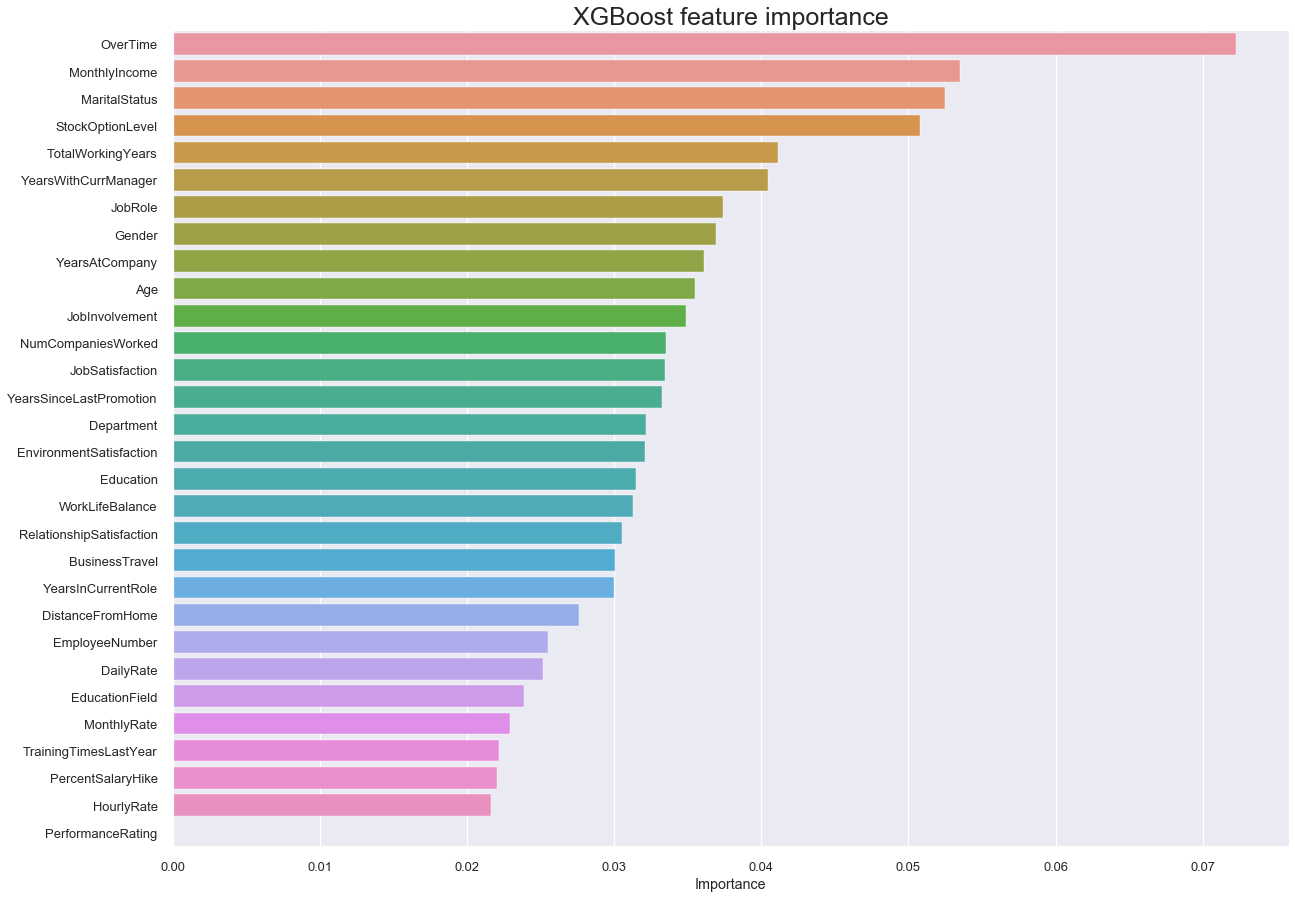

In [56]:
plt.figure(figsize=(20,15))
sns.barplot(x="Importance", y=xgbimp.index, data=xgbimp)
plt.title("XGBoost feature importance", fontsize=25)
plt.show()

## 8.- PERMUTATION IMPORTANCE

It is a very easy way to get an intuition about the impact of a variable. 

Permutation Importance shuffles the features. The score will drop dramatically only when corresponds to feature that adds information to it. 

It seems there is some consistency (but not strong) with the features previously shown on "Feature Importance" in XGBoost.

In [57]:
perm = PermutationImportance(myxgb, random_state=43).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

## 9.- PARTIAL DEPENDENCE PLOTS & SHAP VALUES

This techique allows us to have an idea about the relationship or impact of a feature and the dependend variable because this technique forces certain values (X axis) for the feature and its corresponding prediction.

The features chosen for this analysis are some of the most relevant ('OverTime', 'MonthlyIncome', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Education'). As an example, if we look at the behaviour of the categorical feature 'Education' we can see that some 'levels' have a very little impact on the probability of leaving the company (Attrition) whereas others increase this "probability" significantly.

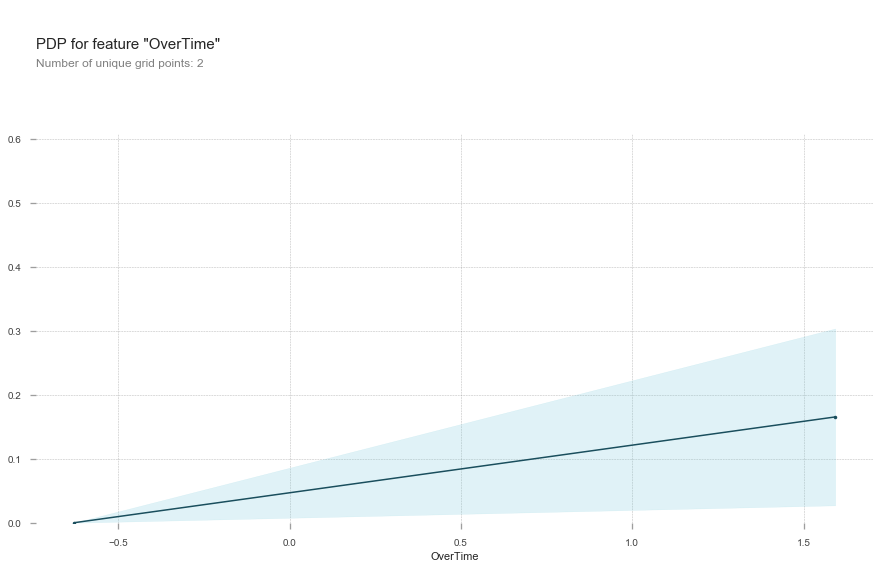

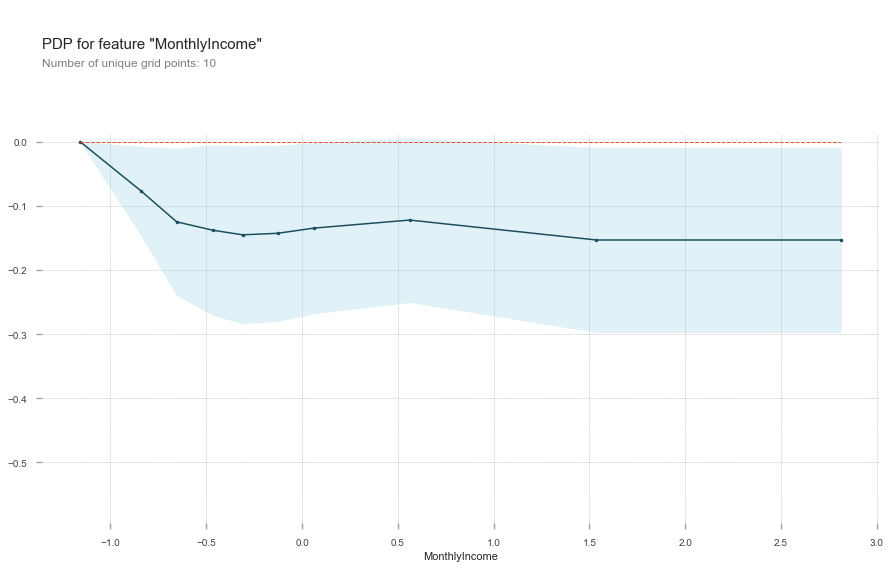

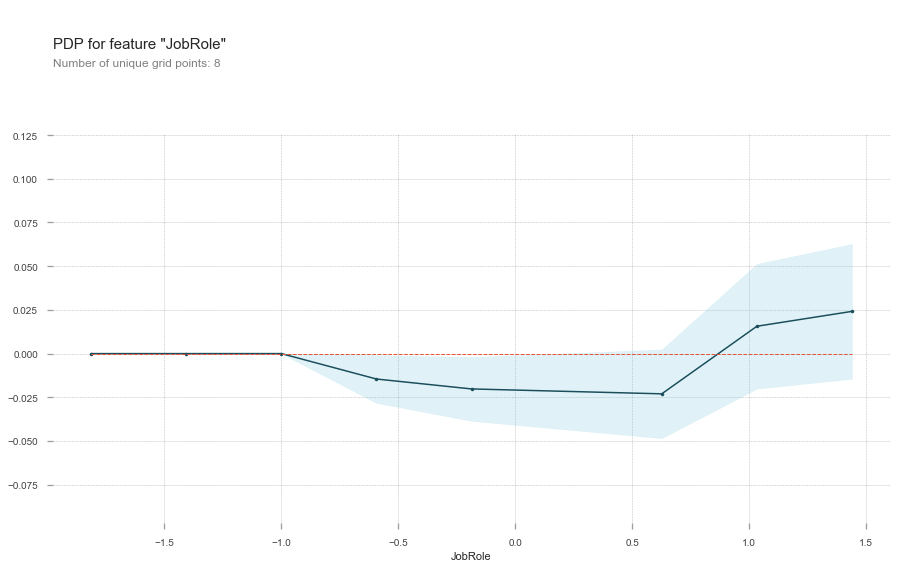

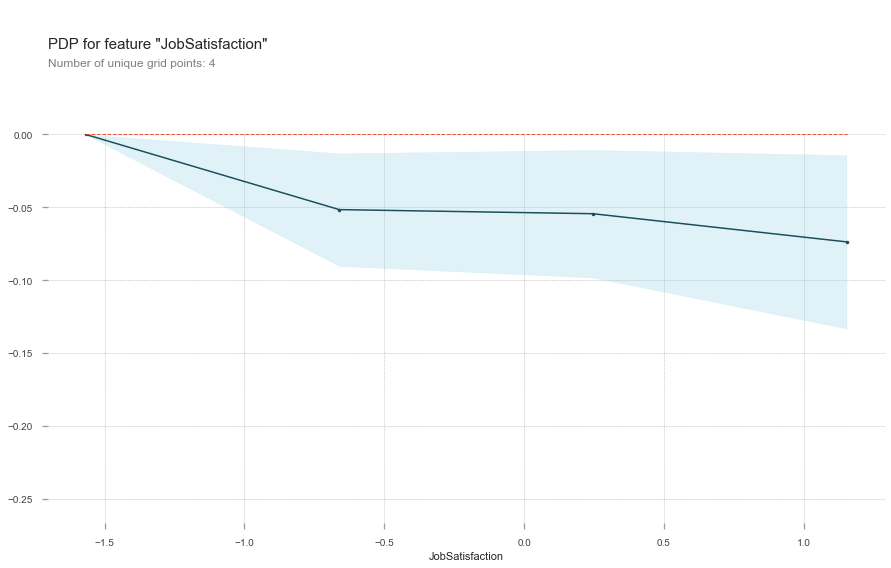

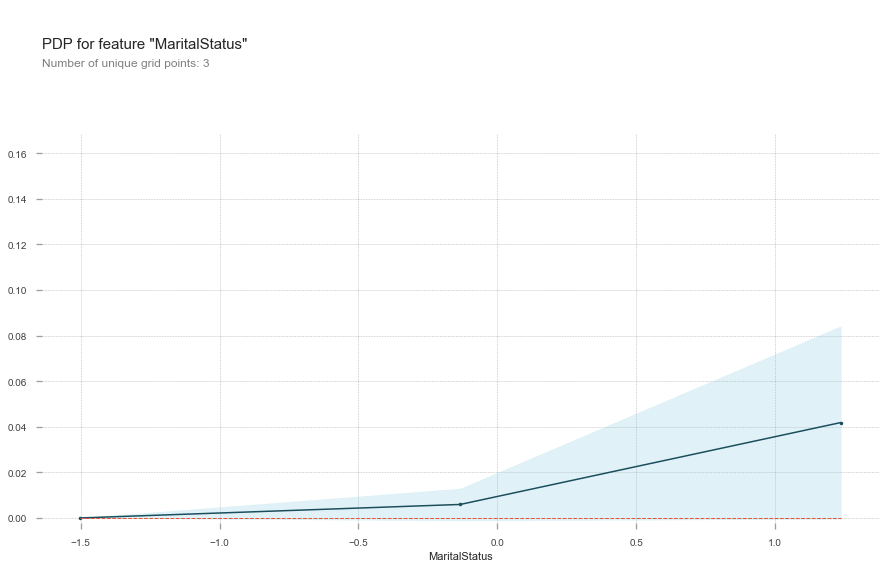

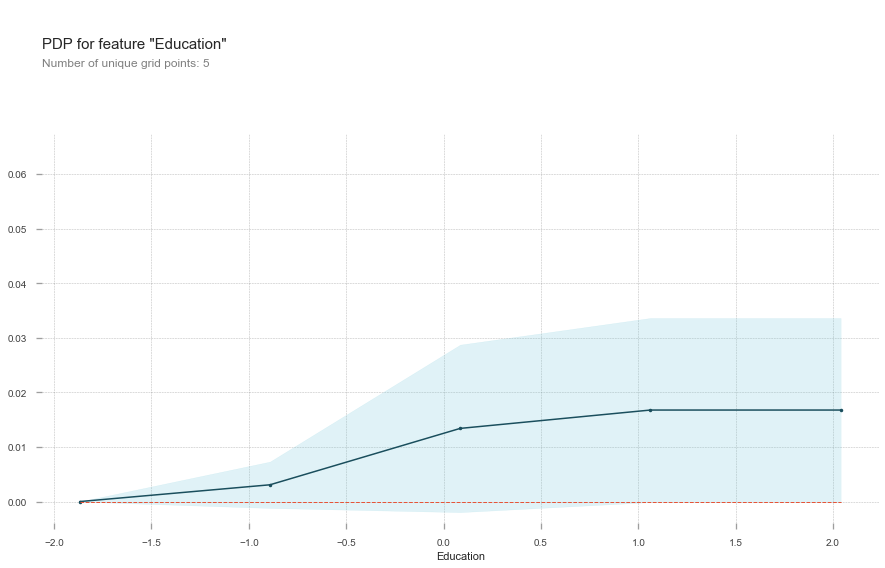

<Figure size 864x576 with 0 Axes>

In [58]:

def pdp_iso(feat):
    return pdp.pdp_isolate(model=myxgb, dataset=X_test, model_features= X_train.columns, feature=feat)  
    
pdp_ot = pdp_iso("OverTime")
pdp_mi= pdp_iso("MonthlyIncome")
pdp_jb = pdp_iso("JobRole")
pdp_js = pdp_iso("JobSatisfaction")
pdp_ms = pdp_iso("MaritalStatus")
pdp_e = pdp_iso("Education")

pdp_lt = [pdp_ot, pdp_mi, pdp_jb, pdp_js, pdp_ms, pdp_e]
feat = ['OverTime', 'MonthlyIncome', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Education']


def pdp_p(iso, feat):
    return pdp.pdp_plot(pdp_isolate_out=iso, feature_name=feat)

pdp_p(pdp_ot, 'OverTime')

pdp_p(pdp_mi, 'MonthlyIncome')

pdp_p(pdp_jb, 'JobRole')

pdp_p(pdp_js, 'JobSatisfaction')

pdp_p(pdp_ms, 'MaritalStatus')

pdp_p(pdp_e, 'Education')

plt.figure(figsize=(12,8))
plt.show()

If we want to look into an specific row of the dataset and analyse the contribution of the features, SHAP values are able to do this by comparing the baseline prediction and the current shap prediction.

In the below example for 25 row, we can see that baseLine -1.66 versus my predicted output -3.51. Features like MonthlyIncome, JobSatisfaction, StockOption levels made the output value lower than the baseline whereas DistancefromHome and Age played the opposite role.

In [59]:
explainer = shap.TreeExplainer(myxgb)
shap_values = explainer.shap_values(X_test.iloc[25])

In [60]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[25])

In [62]:
explainer = shap.TreeExplainer(myxgb)
shap_values = explainer.shap_values(X_test.iloc[44])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[44])

It is also interesting to look into all the features and their "importance" relating to Attrition dependent variable.

It is nice to see that most of the features have points distributed in two different 'clusters' with separated high and low values and in some cases, there is a great separation between these two clusters. There are some clear cases correspond to 'Overtime' feature which predicts greater shap values (prediction) for higher values which is consistent with the "partial dependece plot". On the other hand, 'Age' shows lower values related to greater shap values whereas middle values for this feature are related to a close to 0 shap value.

Usually the features on the top represents a good 'explainability', that is, same values within same clusters (purer clusters) with great distance between them. 

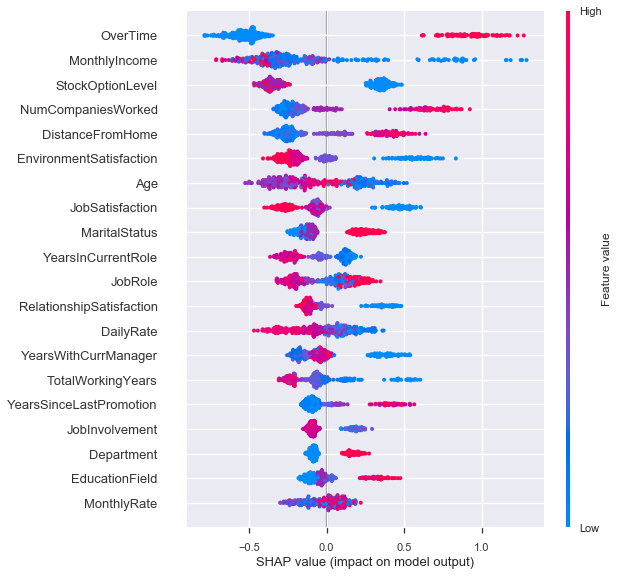

In [70]:
explainer1 = shap.TreeExplainer(myxgb)
shap_values1 = explainer1.shap_values(X_test)
shap.summary_plot(shap_values1, X_test)

Thank you for reading!!